In [1]:
#imports
import pandas
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load in the csvs https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset?resource=download
dframe60s = pandas.read_csv("https://raw.githubusercontent.com/fortyTwo102/hitpredictor-decade-util/master/Database/The%20Spotify%20Hit%20Predictor%20Dataset/dataset-of-60s.csv", engine = 'python', encoding="utf8")
dframe70s = pandas.read_csv("https://raw.githubusercontent.com/fortyTwo102/hitpredictor-decade-util/master/Database/The%20Spotify%20Hit%20Predictor%20Dataset/dataset-of-70s.csv", engine = 'python', encoding="utf8")
dframe80s = pandas.read_csv("https://raw.githubusercontent.com/fortyTwo102/hitpredictor-decade-util/master/Database/The%20Spotify%20Hit%20Predictor%20Dataset/dataset-of-80s.csv", engine = 'python', encoding="utf8")
dframe90s = pandas.read_csv("https://raw.githubusercontent.com/fortyTwo102/hitpredictor-decade-util/master/Database/The%20Spotify%20Hit%20Predictor%20Dataset/dataset-of-90s.csv", engine = 'python', encoding="utf8")
dframe00s = pandas.read_csv("https://raw.githubusercontent.com/fortyTwo102/hitpredictor-decade-util/master/Database/The%20Spotify%20Hit%20Predictor%20Dataset/dataset-of-00s.csv", engine = 'python', encoding="utf8")
dframe10s = pandas.read_csv("https://raw.githubusercontent.com/fortyTwo102/hitpredictor-decade-util/master/Database/The%20Spotify%20Hit%20Predictor%20Dataset/dataset-of-10s.csv", engine = 'python', encoding="utf8")

In [3]:
#remove a useless column
dframe60s.pop('uri');
dframe70s.pop('uri');
dframe80s.pop('uri');
dframe90s.pop('uri');
dframe00s.pop('uri');
dframe10s.pop('uri');

In [4]:
#take the avg of each column, grouped by the column (what we want to predict)
avg60s = dframe60s.groupby('target').mean()
avg70s = dframe70s.groupby('target').mean()
avg80s = dframe80s.groupby('target').mean()
avg90s = dframe90s.groupby('target').mean()
avg00s = dframe00s.groupby('target').mean()
avg10s = dframe10s.groupby('target').mean()

target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

      The author's condition of a track being 'flop' is as follows:

        - The track must not appear in the 'hit' list of that decade.
        - The track's artist must not appear in the 'hit' list of that decade.
        - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
        - The track's genre must not have a song in the 'hit' list.
        - The track must have 'US' as one of its markets.

In [5]:
#combine all averages to make hub to visualize
tempFrame = [avg60s, avg70s, avg80s, avg90s, avg00s, avg10s]
allFrame = pandas.concat(tempFrame)
tempYears = [1960, 1960, 1970, 1970, 1980, 1980, 1990, 1990, 2000, 2000, 2010, 2010]
allFrame['year'] = tempYears
allFrame = allFrame.reset_index()
display(allFrame)

,target,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,year
0,0,0.453756,0.379267,5.012960,-13.609830,0.672298,0.075488,0.694324,0.249595,0.207899,0.486502,111.507857,201594.851423,3.791946,39.186581,9.479750,1960
1,1,0.530582,0.511152,5.140014,-10.449623,0.838926,0.049316,0.536790,0.050243,0.219162,0.663424,118.742690,165681.836843,3.841240,38.689844,8.288822,1960
2,0,0.480631,0.471024,5.281998,-13.012062,0.680144,0.070965,0.527433,0.275982,0.206295,0.527134,118.314512,245948.174350,3.827711,40.317710,11.048931,1970
3,1,0.570370,0.584880,5.134690,-10.456478,0.763842,0.053141,0.341048,0.048343,0.193293,0.664852,119.704382,233918.058460,3.940252,39.377945,10.473088,1970
4,0,0.504073,0.563043,5.177186,-12.207036,0.666763,0.069177,0.381555,0.251287,0.219398,0.518783,119.431343,252393.034453,3.880718,40.223036,11.218877,1980
5,1,0.624444,0.653031,5.289519,-9.876752,0.708454,0.046635,0.204579,0.028439,0.182619,0.657061,121.867801,257119.786335,3.971917,39.287307,11.336422,1980
6,0,0.485017,0.546950,5.075362,-11.947620,0.678261,0.069840,0.412928,0.289959,0.215048,0.493754,119.874108,248673.717391,3.882246,41.979795,10.927899,1990
7,1,0.648769,0.657542,5.450725,-8.522604,0.660870,0.078152,0.169511,0.029814,0.179356,0.581617,117.806741,263748.270652,3.962681,40.018922,11.328623,1990
8,0,0.455812,0.674414,5.292234,-9.221220,0.599114,0.086934,0.280740,0.292976,0.208374,0.410734,122.942444,277478.312670,3.857970,42.624868,11.636921,2000
9,1,0.630049,0.714608,5.260559,-5.677296,0.691076,0.097785,0.148008,0.008858,0.183907,0.553791,120.283592,238862.943801,3.970027,38.843723,10.476839,2000


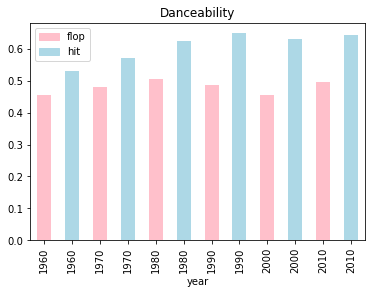

The difference between the averages of the "Danceability" for if the song was a hit or a flop is : 0.2117109090799635


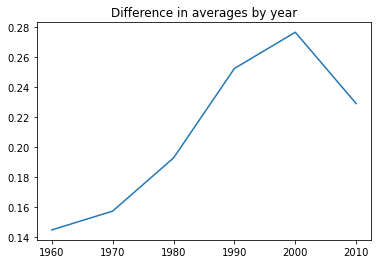

In [6]:
#Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements 
#Including tempo, rhythm stability, beat strength, and overall regularity. 
#A value of 0.0 is least danceable and 1.0 is most danceable. 

allFrame.plot.bar(x = 'year', y = 'danceability', color = ["pink", "lightblue"], title = 'Danceability')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=2)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph1 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 1]
    hit = allFrame.iloc[i + 1, 1]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph1[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph1[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Danceability" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph1)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

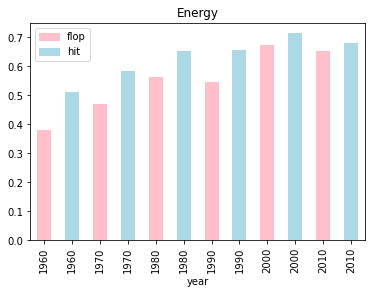

The difference between the averages of the "Energy" for if the song was a hit or a flop is : 0.13559226690543938


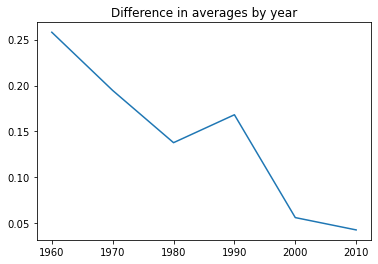

In [7]:
#Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
#Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
#Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

allFrame.plot.bar(x = 'year', y = 'energy', color = ["pink", "lightblue"], title = 'Energy')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=2)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph2 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 2]
    hit = allFrame.iloc[i + 1, 2]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph2[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph2[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Energy" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph2)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

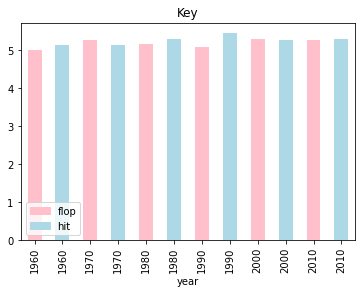

The difference between the averages of the "Key" for if the song was a hit or a flop is : 0.02640190587708861


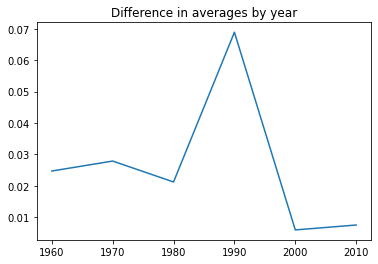

In [8]:
#Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. 
#E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

allFrame.plot.bar(x = 'year', y = 'key', color = ["pink", "lightblue"], title = 'Key')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=3)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph3 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 3]
    hit = allFrame.iloc[i + 1, 3]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph3[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph3[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Key" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph3)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

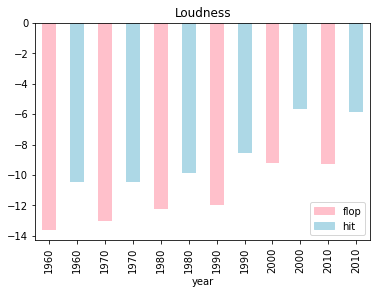

The difference between the averages of the "Loudness" for if the song was a hit or a flop is : 0.266128055053582


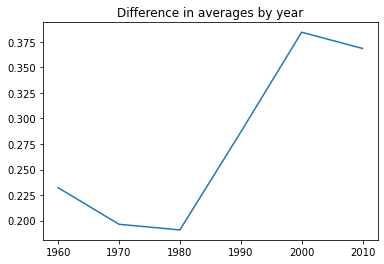

In [9]:
#Loudness: The overall loudness of a track in decibels (dB). 
#Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 
#Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). 
#Values typical range between -60 and 0 db.

allFrame.plot.bar(x = 'year', y = 'loudness', color = ["pink", "lightblue"], title = 'Loudness')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=4)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph4 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = abs(allFrame.iloc[i, 4])
    hit = abs(allFrame.iloc[i + 1, 4])
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph4[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph4[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Loudness" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph4)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

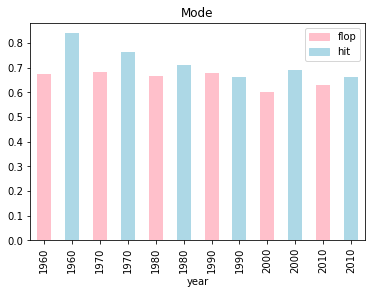

The difference between the averages of the "Mode" for if the song was a hit or a flop is : 0.09990860329238804


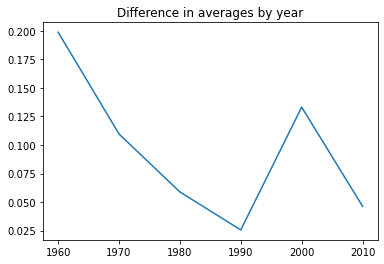

In [10]:
#Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
#Major is represented by 1 and minor is 0.

allFrame.plot.bar(x = 'year', y = 'mode', color = ["pink", "lightblue"], title = 'Mode')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=1)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph5 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 5]
    hit = allFrame.iloc[i + 1, 5]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph5[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph5[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Mode" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph5)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

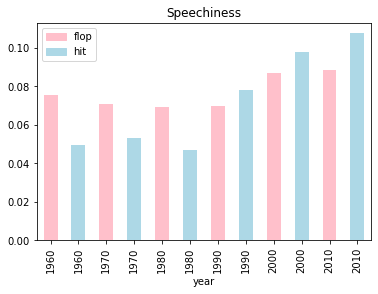

The difference between the averages of the "Speechiness" for if the song was a hit or a flop is : 0.22718607745893496


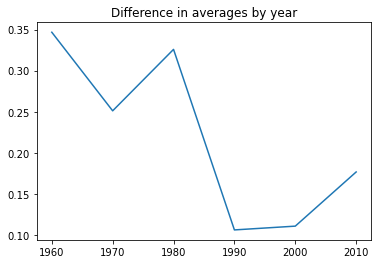

In [11]:
#Speechiness: Speechiness detects the presence of spoken words in a track. 
#The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
#Values above 0.66 describe tracks that are probably made entirely of spoken words. 
#Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. 
#Values below 0.33 most likely represent music and other non-speech-like tracks. 

allFrame.plot.bar(x = 'year', y = 'speechiness', color = ["pink", "lightblue"], title = 'Speechiness')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=2)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph6 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 6]
    hit = allFrame.iloc[i + 1, 6]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph6[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph6[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Speechiness" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph6)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

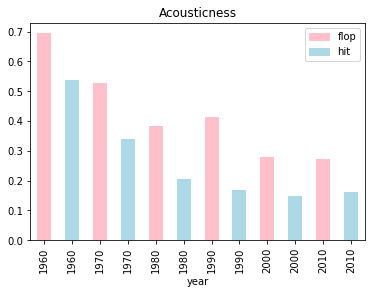

The difference between the averages of the "Acousticness" for if the song was a hit or a flop is : 0.3918596471543547


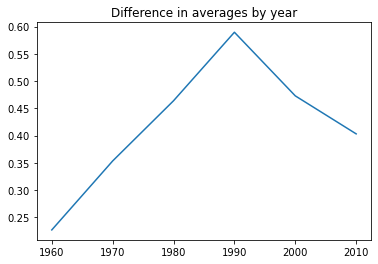

In [12]:
#Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
#1.0 represents high confidence the track is acoustic. 

allFrame.plot.bar(x = 'year', y = 'acousticness', color = ["pink", "lightblue"], title = 'Acousticness')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=1)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph7 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 7]
    hit = allFrame.iloc[i + 1, 7]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph7[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph7[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Acousticness" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph7)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

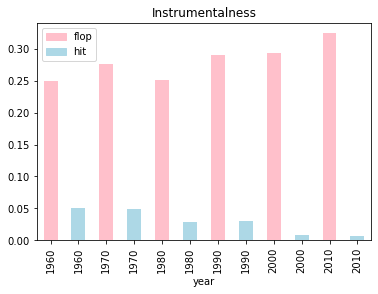

The difference between the averages of the "Instrumentalness" for if the song was a hit or a flop is : 0.8980284727763848


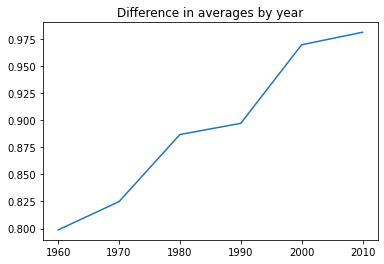

In [13]:
#Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. 
#Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
#Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

allFrame.plot.bar(x = 'year', y = 'instrumentalness', color = ["pink", "lightblue"], title = 'Instrumentalness')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=2)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph8 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 8]
    hit = allFrame.iloc[i + 1, 8]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph8[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph8[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Instrumentalness" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph8)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

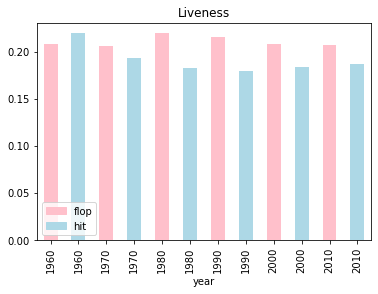

The difference between the averages of the "Liveness" for if the song was a hit or a flop is : 0.11233805982732366


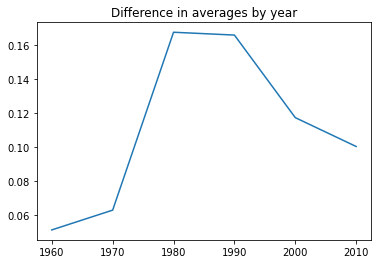

In [14]:
#Liveness: Detects the presence of an audience in the recording. 
#Higher liveness values represent an increased probability that the track was performed live. 
#A value above 0.8 provides strong likelihood that the track is live

allFrame.plot.bar(x = 'year', y = 'liveness', color = ["pink", "lightblue"], title = 'Liveness')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=3)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph9 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 9]
    hit = allFrame.iloc[i + 1, 9]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph9[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph9[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Liveness" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph9)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

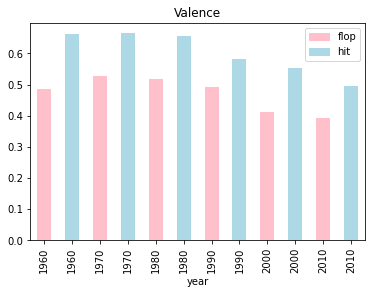

The difference between the averages of the "Valence" for if the song was a hit or a flop is : 0.21689941232911583


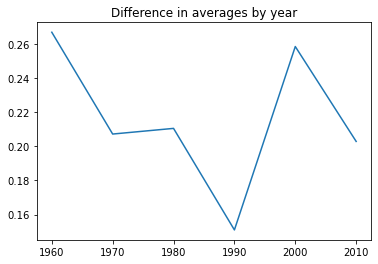

In [15]:
#Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
#Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric)
#Tracks with low valence sound more negative (e.g. sad, depressed, angry)

allFrame.plot.bar(x = 'year', y = 'valence', color = ["pink", "lightblue"], title = 'Valence')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=1)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph10 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 10]
    hit = allFrame.iloc[i + 1, 10]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph10[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph10[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Valence" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph10)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

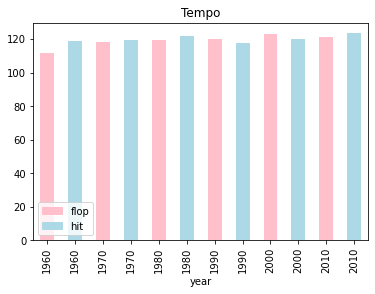

The difference between the averages of the "Tempo" for if the song was a hit or a flop is : 0.025111568022703333


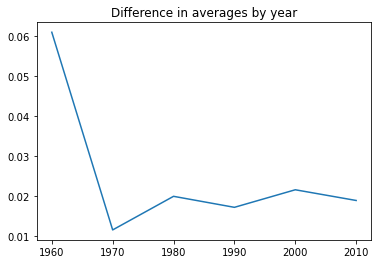

In [16]:
#Tempo: The overall estimated tempo of a track in beats per minute (BPM). 
#In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

allFrame.plot.bar(x = 'year', y = 'tempo', color = ["pink", "lightblue"], title = 'Tempo')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=3)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph11 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 11]
    hit = allFrame.iloc[i + 1, 11]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph11[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph11[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Tempo" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph11)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

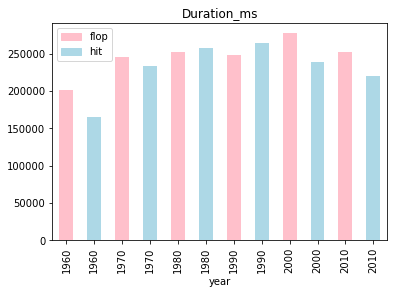

The difference between the averages of the "Duration_ms" for if the song was a hit or a flop is : 0.0938224976396589


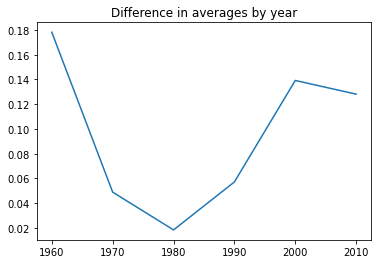

In [17]:
#Duration_ms:  The duration of the track in milliseconds

allFrame.plot.bar(x = 'year', y = 'duration_ms', color = ["pink", "lightblue"], title = 'Duration_ms')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=2)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph12 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 12]
    hit = allFrame.iloc[i + 1, 12]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph12[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph12[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Duration_ms" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph12)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

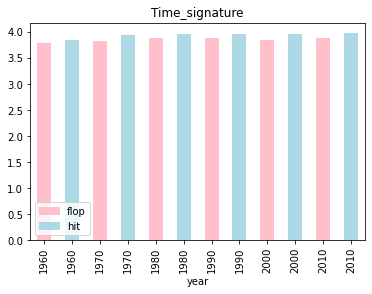

The difference between the averages of the "Time_signature" for if the song was a hit or a flop is : 0.02289468479340002


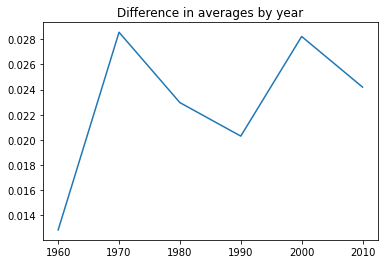

In [18]:
#Time_signature: An estimated overall time signature of a track. 
#The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)

allFrame.plot.bar(x = 'year', y = 'time_signature', color = ["pink", "lightblue"], title = 'Time_signature')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=3)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph13 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 13]
    hit = allFrame.iloc[i + 1, 13]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph13[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph13[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Time_signature" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph13)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

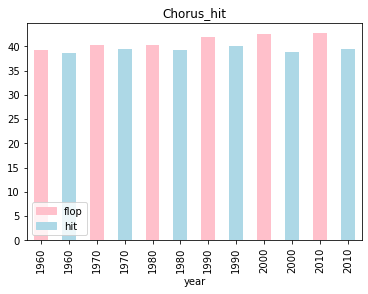

The difference between the averages of the "Chorus_hit" for if the song was a hit or a flop is : 0.046405032485985646


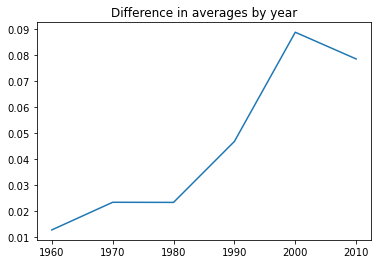

In [19]:
#Chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. 
#This feature was extracted from the data received by the API call for Audio Analysis of that particular track

allFrame.plot.bar(x = 'year', y = 'chorus_hit', color = ["pink", "lightblue"], title = 'Chorus_hit')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=3)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph14 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 14]
    hit = allFrame.iloc[i + 1, 14]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph14[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph14[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Chorus_hit" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph14)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

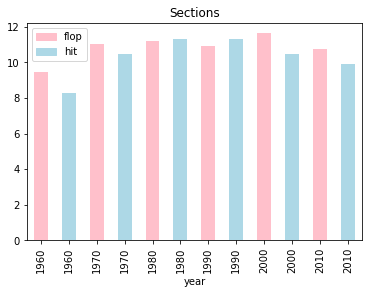

The difference between the averages of the "Sections" for if the song was a hit or a flop is : 0.06611630949396352


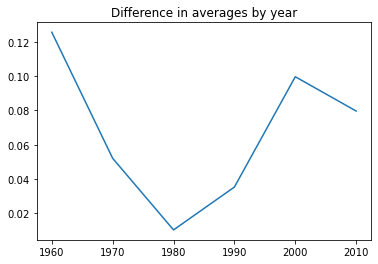

In [20]:
#Sections: The number of sections the particular track has. 
#This feature was extracted from the data received by the API call for Audio Analysis of that particular track

allFrame.plot.bar(x = 'year', y = 'sections', color = ["pink", "lightblue"], title = 'Sections')
#https://stackoverflow.com/questions/29639973/custom-legend-in-pandas-bar-plot-matplotlib for legend
flop = mpatches.Patch(color='pink', label='flop')
hit = mpatches.Patch(color='lightblue', label='hit')
plt.legend(handles=[flop, hit], loc=2)
plt.show()

#average diff
sumDiff = 0
flop = 0
avgFlop = 0
hit = 0
avgHit  = 0
#https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size
lineGraph15 = [None] * 6
for i in range(0,12,2):
    #store the value for the flop and hit for bar graph and line graph calculations
    flop = allFrame.iloc[i, 15]
    hit = allFrame.iloc[i + 1, 15]
    #find the differences between the average for the flop and hit
    sumDiff += abs(flop - hit)
    #store the sums of the hit and flops to average later
    avgFlop += flop
    avgHit  += hit
    #store the difference between the flop and hit over the larger of the 2 values
    if flop > hit:
        lineGraph15[int(i/2)] = abs(flop - hit)/flop
    else:
        lineGraph15[int(i/2)] = abs(flop - hit)/hit

#find the average difference over the larger of the flop and hit for an even scale to compare
if avgFlop > avgHit:
    avgDiff = (sumDiff/6)/(avgFlop/6)
elif avgHit > avgFlop:
    avgDiff = (sumDiff/6)/(avgHit/6)

print('The difference between the averages of the "Sections" for if the song was a hit or a flop is : ' + str(avgDiff))

#create line graph https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(lineGraph15)
plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

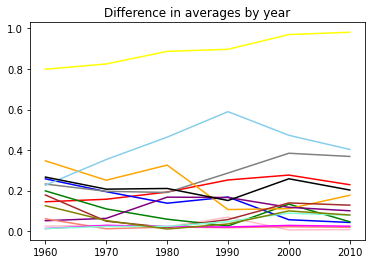

In [21]:
#all line graphs against eachother to look for standouts
plt.plot(lineGraph1, color='red')#danceability: 0.2117
plt.plot(lineGraph2, color='blue')#energy: 0.1355
plt.plot(lineGraph3, color='pink')#key: 0.0264
plt.plot(lineGraph4, color='grey')#loudness: 0.2661
plt.plot(lineGraph5, color='green')#mode: 0.0999
plt.plot(lineGraph6, color='orange')#speechiness: 0.2271
plt.plot(lineGraph7, color='skyblue')#acousticness: 0.3918
plt.plot(lineGraph8, color='yellow')#instrumentalness: 0.8980
plt.plot(lineGraph9, color='purple')#liveness: 0.1123
plt.plot(lineGraph10, color='black')#valence: 0.2168
plt.plot(lineGraph11, color='salmon')#tempo: 0.0251
plt.plot(lineGraph12, color='brown')#duration_ms: 0.0938
plt.plot(lineGraph13, color='magenta')#time_signature: 0.0228
plt.plot(lineGraph14, color='aquamarine')#chorus_hit: 0.0464
plt.plot(lineGraph15, color='olive')#sections: 0.0661

plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

Final Takeaway:
 -instrumentalness seems to be detrimental to this study, may have to remove it to build a classifier that isn't just looking at that feature.
 -some features, such as energy, loudness, and danceability, became more polarizing in recent times.
 -some features, such as time signature and key, are of little importance to determining a hit.
 
 -Other EDA's exists for this project, but use SVM, random forest, logistic regression, and decision trees. I will not use any of these to make sure I don't copy them
 -I plan on using KNN, Naive Bayes, Stochastic Gradient Descent, and potentially a neural network since this data set is relatively small.
 -note for naive bayes: these features are explicitly stated as "not naive" since some features are used to calculate others (tempo is used to caluclate danceability, loudness is used to calculate energy)

START PROJECT 2 - CLASSIFIERS

In [22]:
#Mass imports

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#analysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [23]:
#initial data load
tempFrame2 = [dframe60s, dframe70s, dframe80s, dframe90s, dframe00s, dframe10s]
classFrame = pandas.concat(tempFrame2)
#remove string columns
classFrame.pop('track')
classFrame.pop('artist')

#split data into the features and the target
data = classFrame.drop('target', axis=1)
label = classFrame['target']

#80/20 split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.20)

In [24]:
#scaling the data for KNN (and RF) so the eucledean distance can be easier calcualted
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN RESULTS: 

Using a K value of: 16
[[2704 1449]
 [ 619 3450]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      4153
           1       0.70      0.85      0.77      4069

    accuracy                           0.75      8222
   macro avg       0.76      0.75      0.75      8222
weighted avg       0.76      0.75      0.75      8222

10 fold cross validation reults, accuracy
[0.49160788 0.48990513 0.57698857 0.56969107 0.58209681 0.57261007
 0.57810219 0.62676399 0.60924574 0.586618  ]


10 fold cross validation reults, f1
[0.3742515  0.37570706 0.57008653 0.56288609 0.59990685 0.58473174
 0.58792776 0.65388087 0.63845115 0.6167381 ]


The sum of accuracies from the 10 fold validation is: 0.5683629464832646
The sum of f1 scores from the 10 fold validation is: 0.5564567628202364


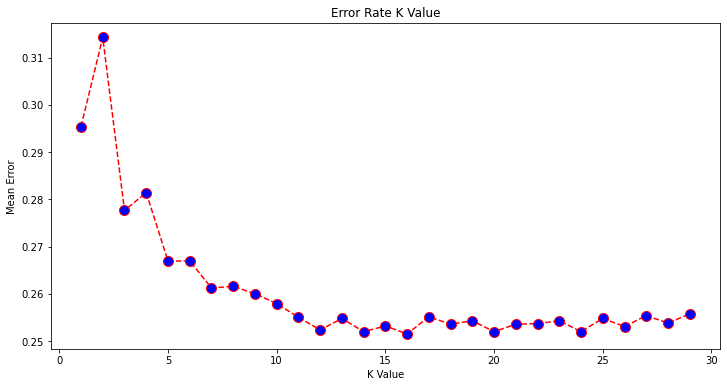

In [25]:
#KNN classifier https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
#Determining optimal k value
error = []

#find optimal k value for this set with k values from 1-30
for i in range(1,30):
    #classifier steps explained below
    knnClassifier = KNeighborsClassifier(n_neighbors=i, n_jobs = -1)
    knnClassifier.fit(X_train_scaled, y_train)

    pred_i = knnClassifier.predict(X_test_scaled)
    
    #make array of error values to graph later
    error.append(np.mean(pred_i != y_test))

#plot error values for each value of K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#get optimal number of k by finding position of lowest error
minError = error[0]
opK = 0
for i in range(0, len(error) - 1):
    if minError > error[i]:
        minError = error[i]
        opK = i + 1
        
print("KNN RESULTS: \n")        

print("Using a K value of: " + str(opK))

#create classifier
knnClassifier = KNeighborsClassifier(n_neighbors=opK)
#train the model on the 80% training data 
knnClassifier.fit(X_train_scaled, y_train)

#try to predict the 20% 
y_pred = knnClassifier.predict(X_test_scaled)


#compare results of predicted and actual
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(knnClassifier, data, label, cv=10)
print(cvs)
cvsavgknn = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(knnClassifier, data, label, cv=10, scoring="f1")
print(cvs)
cvsfknn = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgknn))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfknn))

In [26]:
#Decision Tree with entropy https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
#create classifier for decision tree
dtClassifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
#train model on 80% split
dtClassifier.fit(X_train, y_train)

#predict 20% based on model
y_pred = dtClassifier.predict(X_test)

print("DECISION TREE RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(dtClassifier, data, label, cv=10)
print(cvs)
cvsavgdt = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(dtClassifier, data, label, cv=10, scoring="f1")
print(cvs)
cvsfdt = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgdt))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfdt))
entest = cvsavgdt

DECISION TREE RESULTS: 

[[2682 1471]
 [ 613 3456]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      4153
           1       0.70      0.85      0.77      4069

    accuracy                           0.75      8222
   macro avg       0.76      0.75      0.74      8222
weighted avg       0.76      0.75      0.74      8222

10 fold cross validation reults, accuracy
[0.67599124 0.65726101 0.70274872 0.71126247 0.72512771 0.74385794
 0.7649635  0.78394161 0.79294404 0.76934307]


10 fold cross validation reults, f1
[0.66261398 0.62436684 0.67203435 0.73295838 0.76633581 0.77929155
 0.79118029 0.80911436 0.81843397 0.80461665]


The sum of accuracies from the 10 fold validation is: 0.7327441301925106
The sum of f1 scores from the 10 fold validation is: 0.7460946182501503


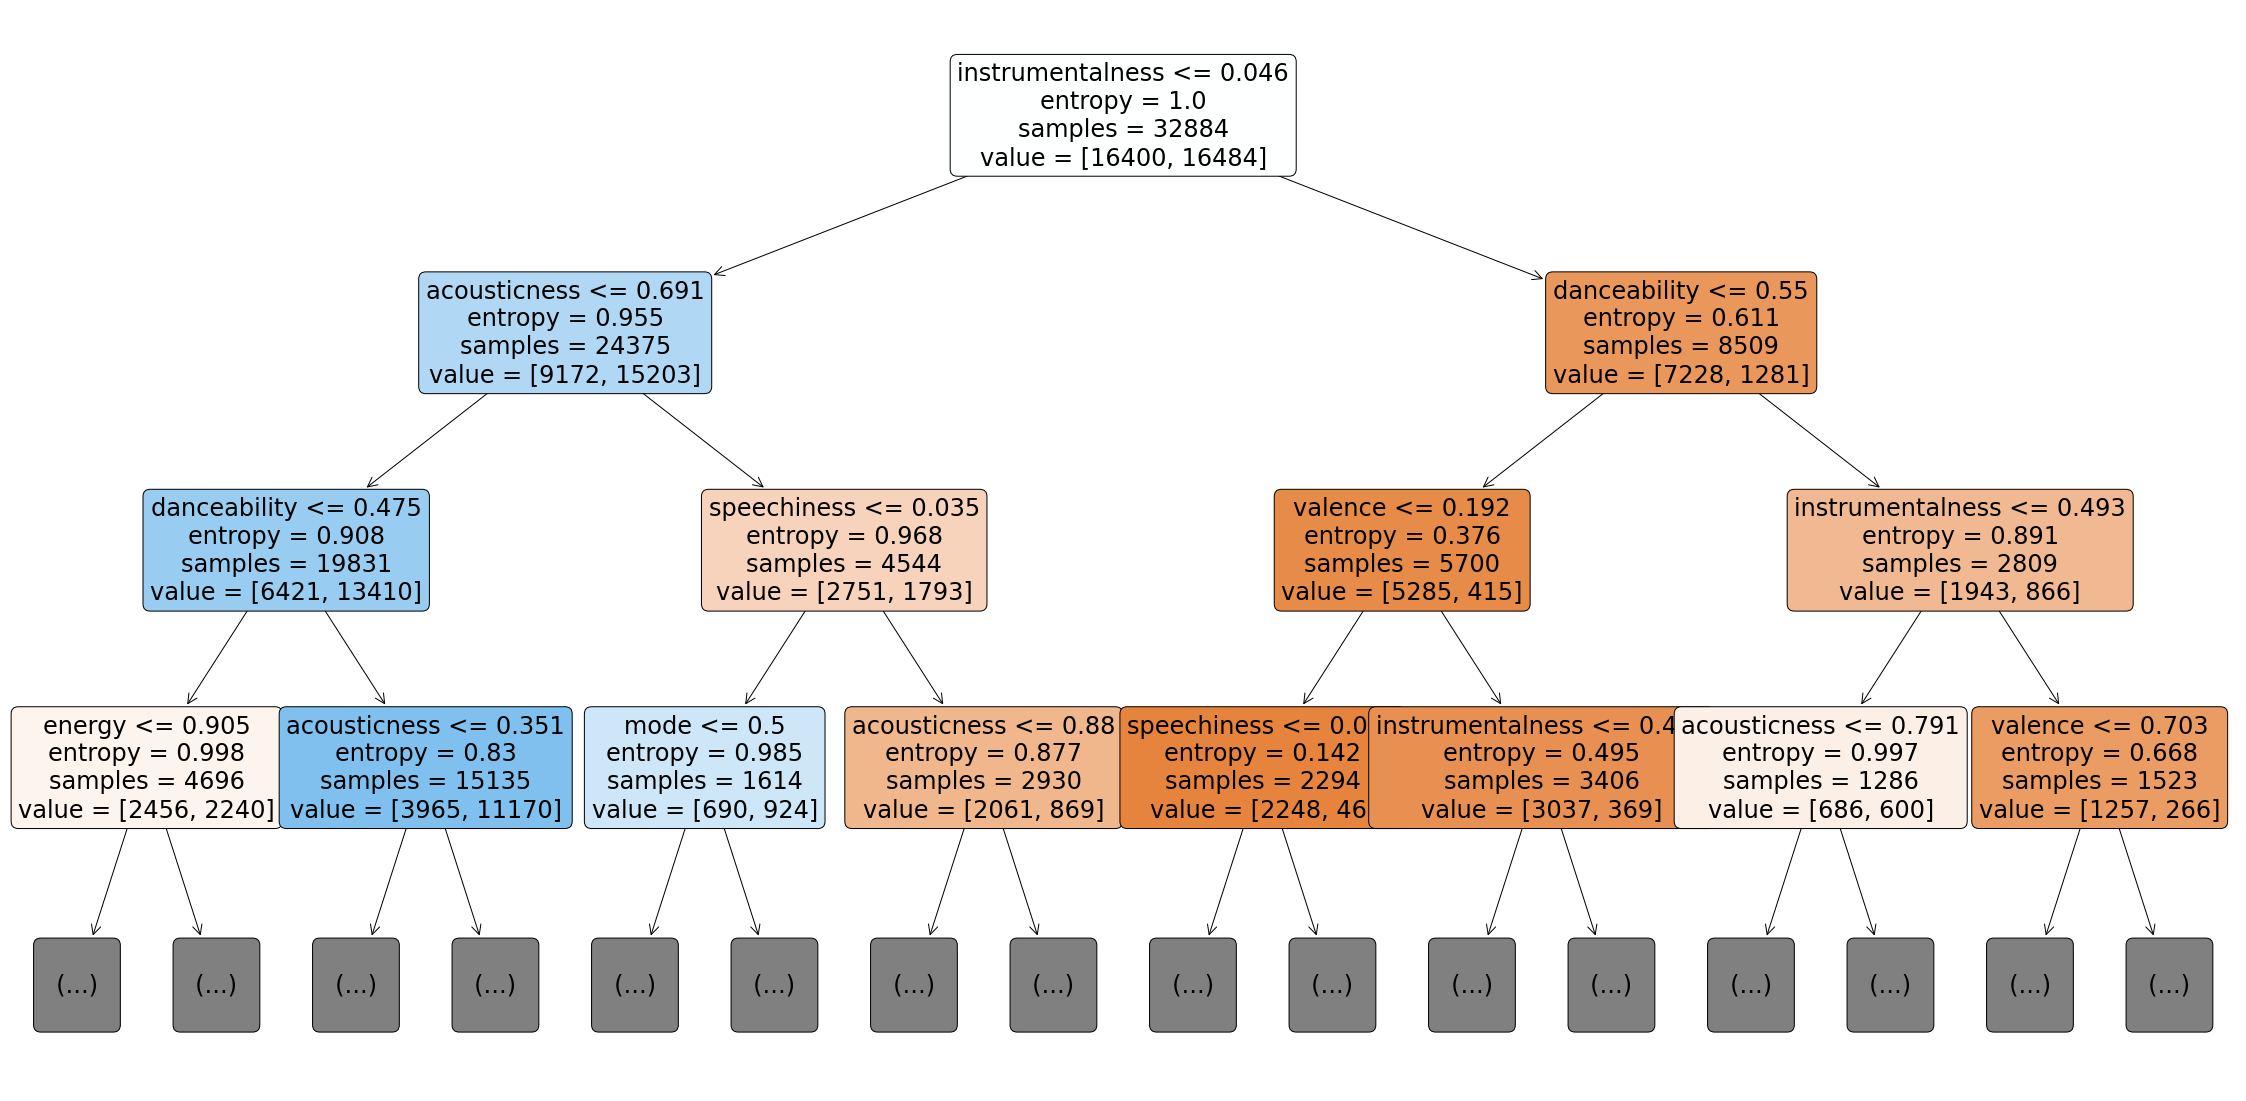

In [27]:
#Print decision tree to understand the data https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(dtClassifier, feature_names = data.columns, 
             filled=True, fontsize=24, rounded = True, max_depth = 3)
plt.show()

In [28]:
#Decision Tree with gini https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
#create classifier for decision tree
dtClassifier2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
#train model on 80% split
dtClassifier2.fit(X_train, y_train)

#predict 20% based on model
y_pred = dtClassifier2.predict(X_test)

print("DECISION TREE RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(dtClassifier2, data, label, cv=10)
print(cvs)
cvsavgdt2 = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(dtClassifier2, data, label, cv=10, scoring="f1")
print(cvs)
cvsfdt2 = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgdt2))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfdt2))
ginitest = cvsavgdt2

DECISION TREE RESULTS: 

[[2603 1550]
 [ 552 3517]]
              precision    recall  f1-score   support

           0       0.83      0.63      0.71      4153
           1       0.69      0.86      0.77      4069

    accuracy                           0.74      8222
   macro avg       0.76      0.75      0.74      8222
weighted avg       0.76      0.74      0.74      8222

10 fold cross validation reults, accuracy
[0.68523474 0.69423498 0.72731695 0.71855996 0.72196546 0.73558745
 0.75158151 0.78491484 0.79318735 0.76569343]


10 fold cross validation reults, f1
[0.67471091 0.69600967 0.74271288 0.73505839 0.76261682 0.77583007
 0.77952926 0.81021898 0.82006774 0.79196371]


The sum of accuracies from the 10 fold validation is: 0.7378276666779117
The sum of f1 scores from the 10 fold validation is: 0.7588718426039713


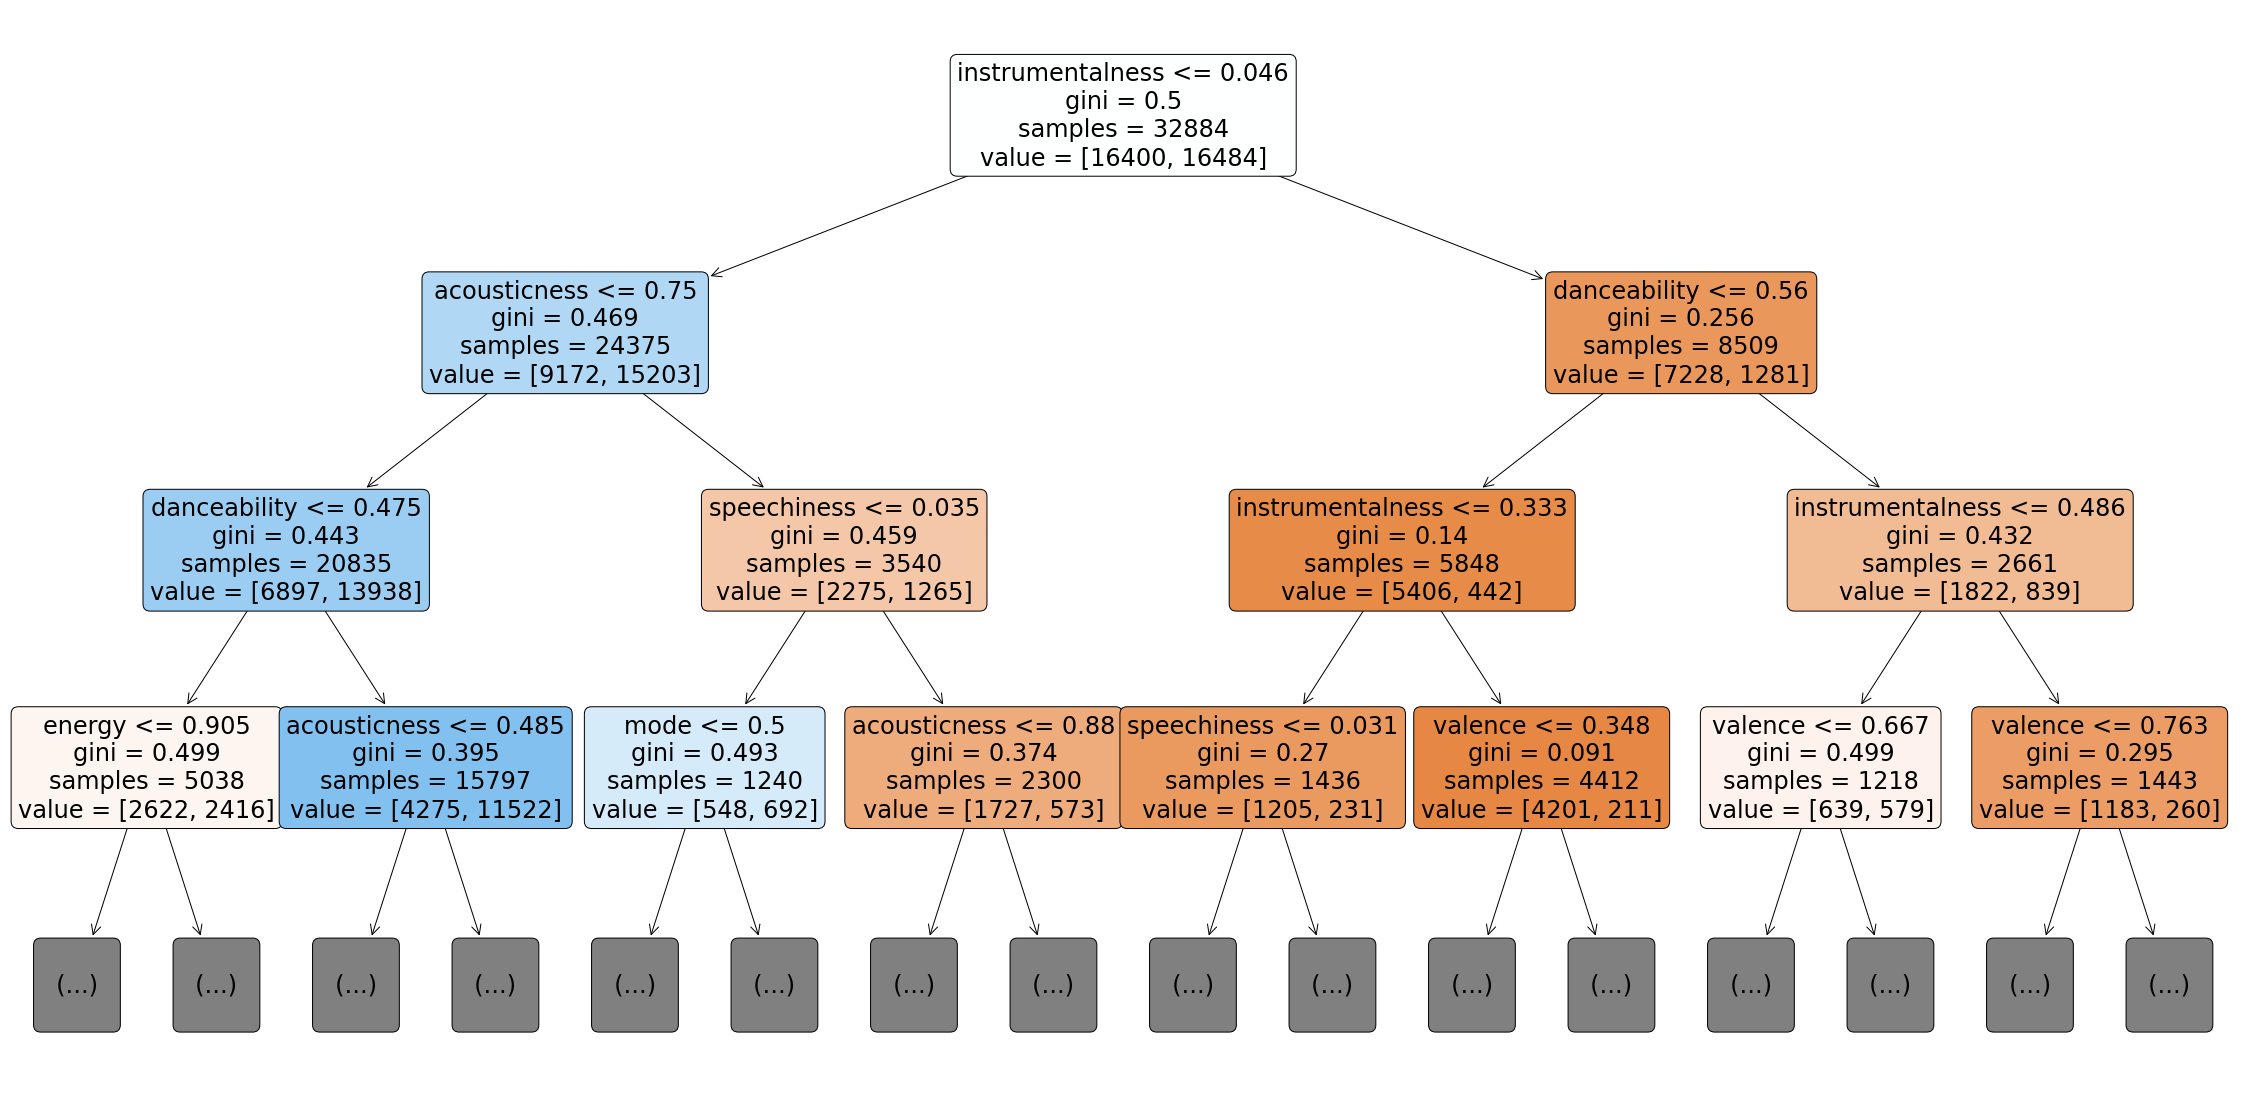

In [29]:
#Print decision tree to understand the data https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(dtClassifier2, feature_names = data.columns, 
             filled=True, fontsize=24, rounded = True, max_depth = 3)
plt.show()

In [30]:
#Random Forest https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
if entest > ginitest:
    rf = RandomForestClassifier(n_estimators=100, n_jobs = -1, criterion = 'entropy', max_depth = 5)
else:
    rf = RandomForestClassifier(n_estimators=100, n_jobs = -1, criterion = 'gini', max_depth = 5)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print("RANDOM FOREST RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(rf, data, label, cv=10)
print(cvs)
cvsavgrf = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(rf, data, label, cv=10, scoring="f1")
print(cvs)
cvsfrf = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgrf))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfrf))

RANDOM FOREST RESULTS: 

[[2716 1437]
 [ 517 3552]]
              precision    recall  f1-score   support

           0       0.84      0.65      0.74      4153
           1       0.71      0.87      0.78      4069

    accuracy                           0.76      8222
   macro avg       0.78      0.76      0.76      8222
weighted avg       0.78      0.76      0.76      8222

10 fold cross validation reults, accuracy
[0.72026271 0.71077597 0.74069569 0.72974945 0.73850645 0.74872294
 0.77688564 0.81021898 0.80364964 0.79270073]


10 fold cross validation reults, f1
[0.72355769 0.70977081 0.75167475 0.75067996 0.77352506 0.78190006
 0.79921943 0.83204467 0.83069688 0.81695487]


The sum of accuracies from the 10 fold validation is: 0.7572168196299645
The sum of f1 scores from the 10 fold validation is: 0.7770024189898621


In [31]:
#apply principle component analysis so the SVM runs in less than 3 days
pca = PCA(n_components=5)
pca.fit(classFrame)
print(pca.explained_variance_ratio_)

X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.fit_transform(X_test)

[9.99999912e-01 5.99824740e-08 2.52158730e-08 1.94228030e-09
 8.82846767e-10]


In [32]:
#SVM using this tutorial https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
svclassifier = SVC()
svclassifier.fit(X_train_PCA, y_train)

#SVM results
y_pred = svclassifier.predict(X_test_PCA)
print("SVM RESULTS: \n")  
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#not doing cross validation due to runtime constraints, also results won't be higher than random forest

#10 fold cross validation results
#print("10 fold cross validation reults, accuracy")
#cvs = cross_val_score(svclassifier, data, label, cv=10)
#print(cvs)
#cvsavgsvm = sum(cvs) / len(cvs)

#10 fold cross validation results f1 score
#print("10 fold cross validation reults, f1")
#cvs = cross_val_score(svclassifier, data, label, cv=10, scoring="f1")
#print(cvs)
#cvsfsvm = sum(cvs) / len(cvs)
#print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgsvm))
#print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfsvm))

SVM RESULTS: 

[[1380 2773]
 [ 566 3503]]
              precision    recall  f1-score   support

           0       0.71      0.33      0.45      4153
           1       0.56      0.86      0.68      4069

    accuracy                           0.59      8222
   macro avg       0.63      0.60      0.56      8222
weighted avg       0.63      0.59      0.56      8222



In [33]:
print("KNN AVG ACCURACY: " + str(cvsavgknn))
print("KNN AVG F1: " + str(cvsfknn) + "\n")

print("DECISION TREE ENTROPY AVG ACCURACY: " + str(cvsavgdt))
print("DECISION TREE ENTROPY AVG F1: " + str(cvsfdt) + "\n")

print("DECISION TREE GINI AVG ACCURACY: " + str(cvsavgdt2))
print("DECISION TREE GINI AVG F1: " + str(cvsfdt2) + "\n")

print("RANDOM FOREST AVG ACCURACY: " + str(cvsavgrf))
print("RANDOM FOREST AVG F1: " + str(cvsavgrf) + "\n")

KNN AVG ACCURACY: 0.5683629464832646
KNN AVG F1: 0.5564567628202364

DECISION TREE ENTROPY AVG ACCURACY: 0.7327441301925106
DECISION TREE ENTROPY AVG F1: 0.7460946182501503

DECISION TREE GINI AVG ACCURACY: 0.7378276666779117
DECISION TREE GINI AVG F1: 0.7588718426039713

RANDOM FOREST AVG ACCURACY: 0.7572168196299645
RANDOM FOREST AVG F1: 0.7572168196299645



In [34]:
dframe60s.pop('instrumentalness');
dframe70s.pop('instrumentalness');
dframe80s.pop('instrumentalness');
dframe90s.pop('instrumentalness');
dframe00s.pop('instrumentalness');
dframe10s.pop('instrumentalness');

In [35]:
#------------------------------------------------------------------------------------------- 60s

#remove string columns
dframe60s.pop('track')
dframe60s.pop('artist')

#split data into the features and the target
data6 = dframe60s.drop('target', axis=1)
label6 = dframe60s['target']

#80/20 split
X_train6, X_test6, y_train6, y_test6 = train_test_split(data6, label6, test_size = 0.20)

#------------------------------------------------------------------------------------------- 70s

#remove string columns
dframe70s.pop('track')
dframe70s.pop('artist')

#split data into the features and the target
data7 = dframe70s.drop('target', axis=1)
label7 = dframe70s['target']

#80/20 split
X_train7, X_test7, y_train7, y_test7 = train_test_split(data7, label7, test_size = 0.20)

#------------------------------------------------------------------------------------------- 80s

#remove string columns
dframe80s.pop('track')
dframe80s.pop('artist')

#split data into the features and the target
data8 = dframe80s.drop('target', axis=1)
label8 = dframe80s['target']

#80/20 split
X_train8, X_test8, y_train8, y_test8 = train_test_split(data8, label8, test_size = 0.20)

#------------------------------------------------------------------------------------------- 90s

#remove string columns
dframe90s.pop('track')
dframe90s.pop('artist')

#split data into the features and the target
data9 = dframe90s.drop('target', axis=1)
label9 = dframe90s['target']

#80/20 split
X_train9, X_test9, y_train9, y_test9 = train_test_split(data9, label9, test_size = 0.20)

#------------------------------------------------------------------------------------------- 00s

#remove string columns
dframe00s.pop('track')
dframe00s.pop('artist')

#split data into the features and the target
data0 = dframe00s.drop('target', axis=1)
label0 = dframe00s['target']

#80/20 split
X_train0, X_test0, y_train0, y_test0 = train_test_split(data0, label0, test_size = 0.20)

#------------------------------------------------------------------------------------------- 10s

#remove string columns
dframe10s.pop('track')
dframe10s.pop('artist')

#split data into the features and the target
data1 = dframe10s.drop('target', axis=1)
label1 = dframe10s['target']

#80/20 split
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1, label1, test_size = 0.20)

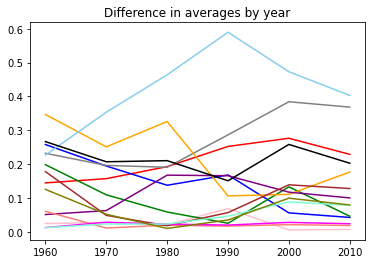

In [36]:
#reintroduce the graph, instrumentalness pulled out
plt.plot(lineGraph1, color='red')#danceability: 0.2117
plt.plot(lineGraph2, color='blue')#energy: 0.1355
plt.plot(lineGraph3, color='pink')#key: 0.0264
plt.plot(lineGraph4, color='grey')#loudness: 0.2661
plt.plot(lineGraph5, color='green')#mode: 0.0999
plt.plot(lineGraph6, color='orange')#speechiness: 0.2271
plt.plot(lineGraph7, color='skyblue')#acousticness: 0.3918
#plt.plot(lineGraph8, color='yellow')#instrumentalness: 0.8980
plt.plot(lineGraph9, color='purple')#liveness: 0.1123
plt.plot(lineGraph10, color='black')#valence: 0.2168
plt.plot(lineGraph11, color='salmon')#tempo: 0.0251
plt.plot(lineGraph12, color='brown')#duration_ms: 0.0938
plt.plot(lineGraph13, color='magenta')#time_signature: 0.0228
plt.plot(lineGraph14, color='aquamarine')#chorus_hit: 0.0464
plt.plot(lineGraph15, color='olive')#sections: 0.0661

plt.title('Difference in averages by year')
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(6), ('1960', '1970', '1980', '1990', '2000', '2010'))
plt.show()

In [37]:
#Decision Tree with entropy https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
#create classifier for decision tree
dtClassifier60 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
#train model on 80% split
dtClassifier60.fit(X_train6, y_train6)

#predict 20% based on model
y_pred6 = dtClassifier60.predict(X_test6)

print("DECISION TREE RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test6, y_pred6))
print(classification_report(y_test6, y_pred6))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(dtClassifier60, data6, label6, cv=10)
print(cvs)
cvsavgdt6 = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(dtClassifier60, data6, label6, cv=10, scoring="f1")
print(cvs)
cvsfdt6 = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgdt6))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfdt6))

DECISION TREE RESULTS: 

[[530 363]
 [152 684]]
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       893
           1       0.65      0.82      0.73       836

    accuracy                           0.70      1729
   macro avg       0.72      0.71      0.70      1729
weighted avg       0.72      0.70      0.70      1729

10 fold cross validation reults, accuracy
[0.72254335 0.72023121 0.73148148 0.73726852 0.72453704 0.72337963
 0.70949074 0.72916667 0.71990741 0.73263889]


10 fold cross validation reults, f1
[0.75951904 0.75456389 0.76180698 0.76525336 0.75614754 0.75637105
 0.73881374 0.75975359 0.75702811 0.76210093]


The sum of accuracies from the 10 fold validation is: 0.7250644936844359
The sum of f1 scores from the 10 fold validation is: 0.7571358234412106


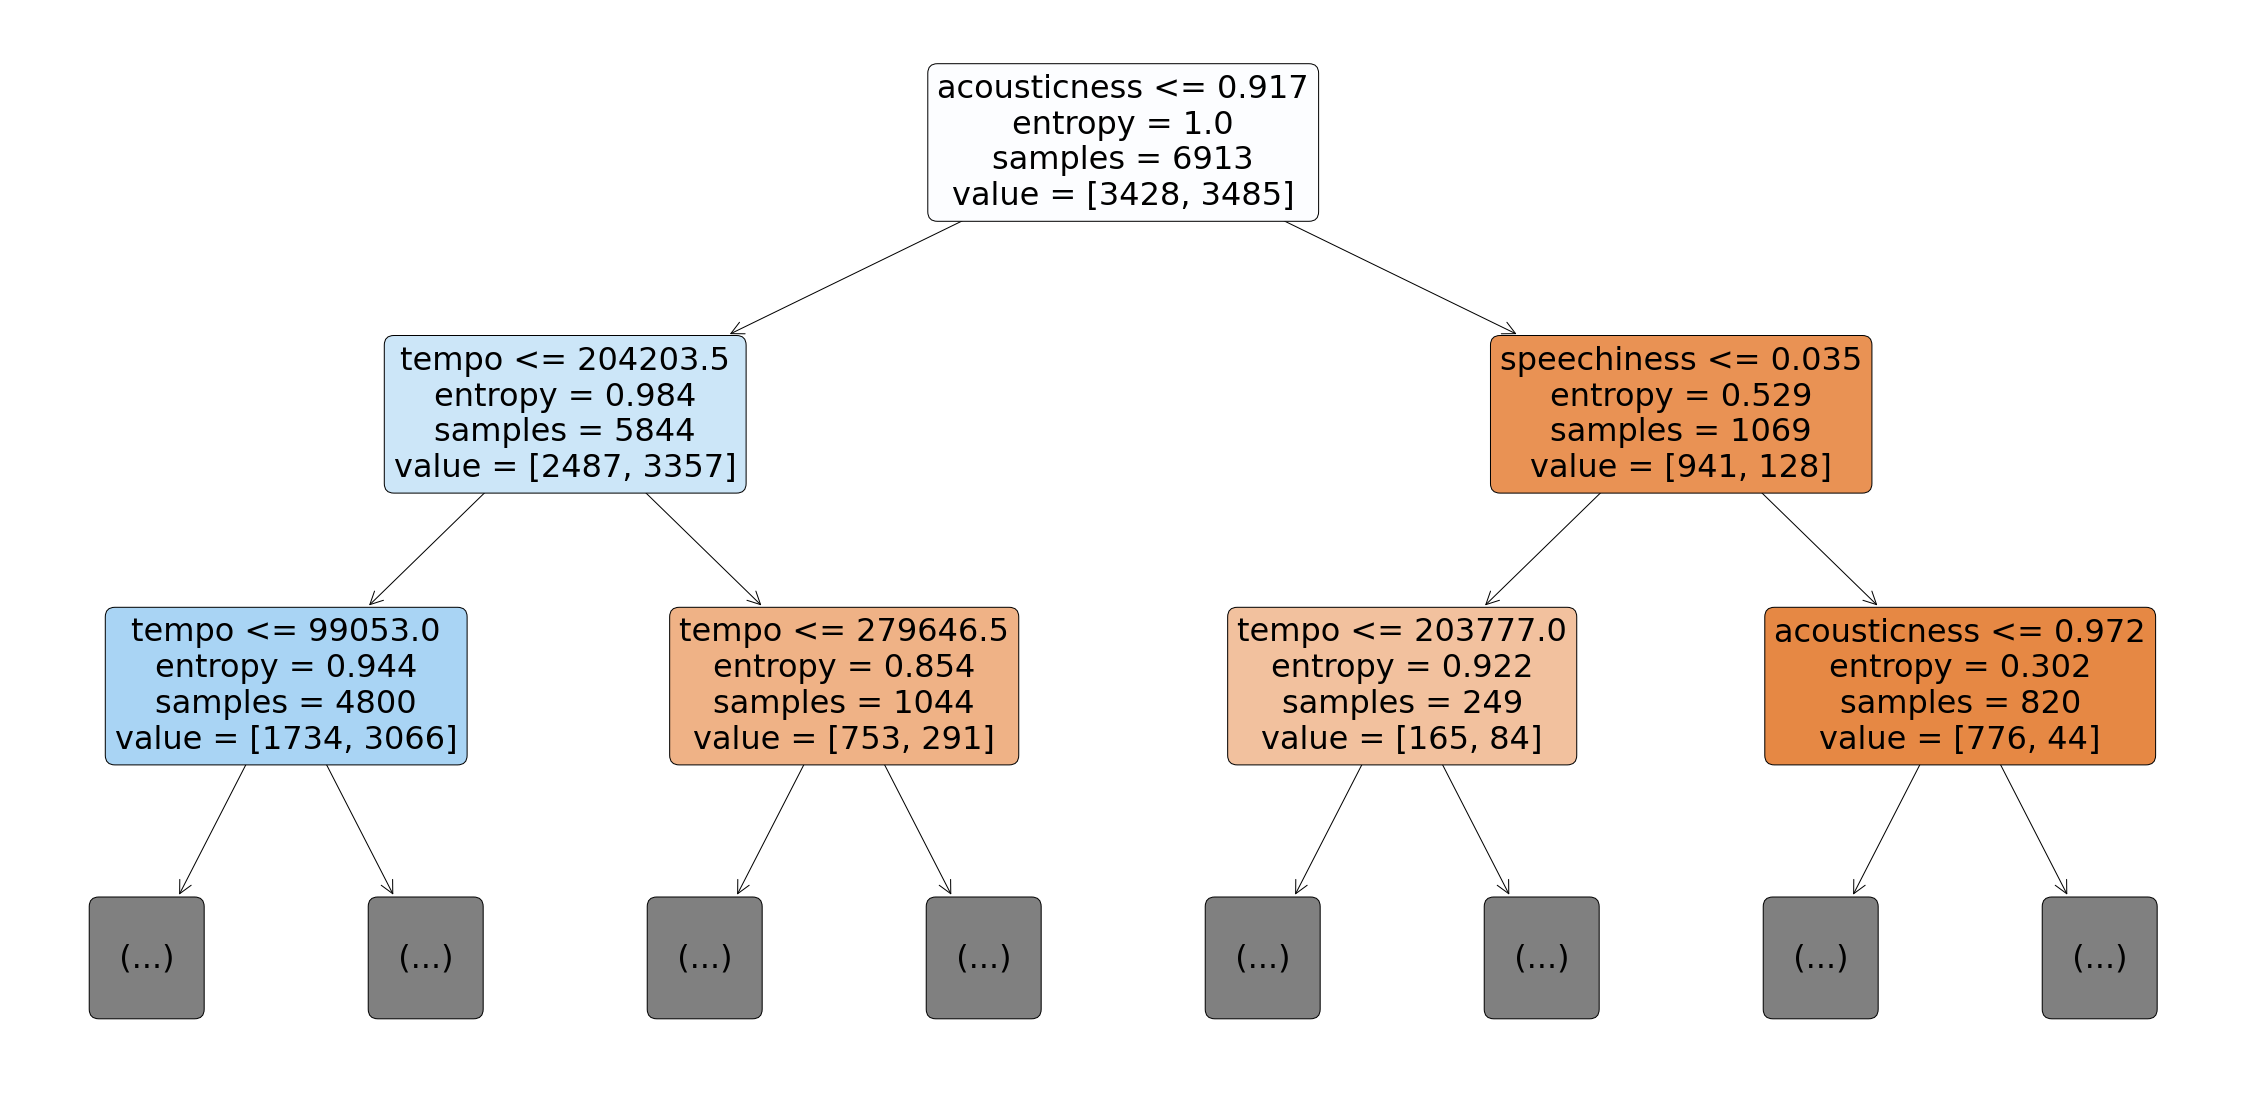

In [38]:
#Print decision tree to understand the data https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(dtClassifier60, feature_names = data.columns, 
             filled=True, fontsize=32, rounded = True, max_depth = 2)
plt.show()

In [39]:
#Decision Tree with entropy https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
#create classifier for decision tree
dtClassifier70 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
#train model on 80% split
dtClassifier70.fit(X_train7, y_train7)

#predict 20% based on model
y_pred7 = dtClassifier70.predict(X_test7)

print("DECISION TREE RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test7, y_pred7))
print(classification_report(y_test7, y_pred7))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(dtClassifier70, data7, label7, cv=10)
print(cvs)
cvsavgdt7 = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(dtClassifier70, data7, label7, cv=10, scoring="f1")
print(cvs)
cvsfdt7 = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgdt7))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfdt7))

DECISION TREE RESULTS: 

[[414 376]
 [ 95 669]]
              precision    recall  f1-score   support

           0       0.81      0.52      0.64       790
           1       0.64      0.88      0.74       764

    accuracy                           0.70      1554
   macro avg       0.73      0.70      0.69      1554
weighted avg       0.73      0.70      0.69      1554

10 fold cross validation reults, accuracy
[0.7014157  0.71428571 0.7039897  0.71428571 0.68211068 0.67567568
 0.70360825 0.68943299 0.72551546 0.69587629]


10 fold cross validation reults, f1
[0.73432155 0.75869565 0.72877358 0.75550661 0.72646733 0.70751445
 0.72791519 0.71878646 0.75657143 0.73883929]


The sum of accuracies from the 10 fold validation is: 0.7006196181453913
The sum of f1 scores from the 10 fold validation is: 0.7353391550778536


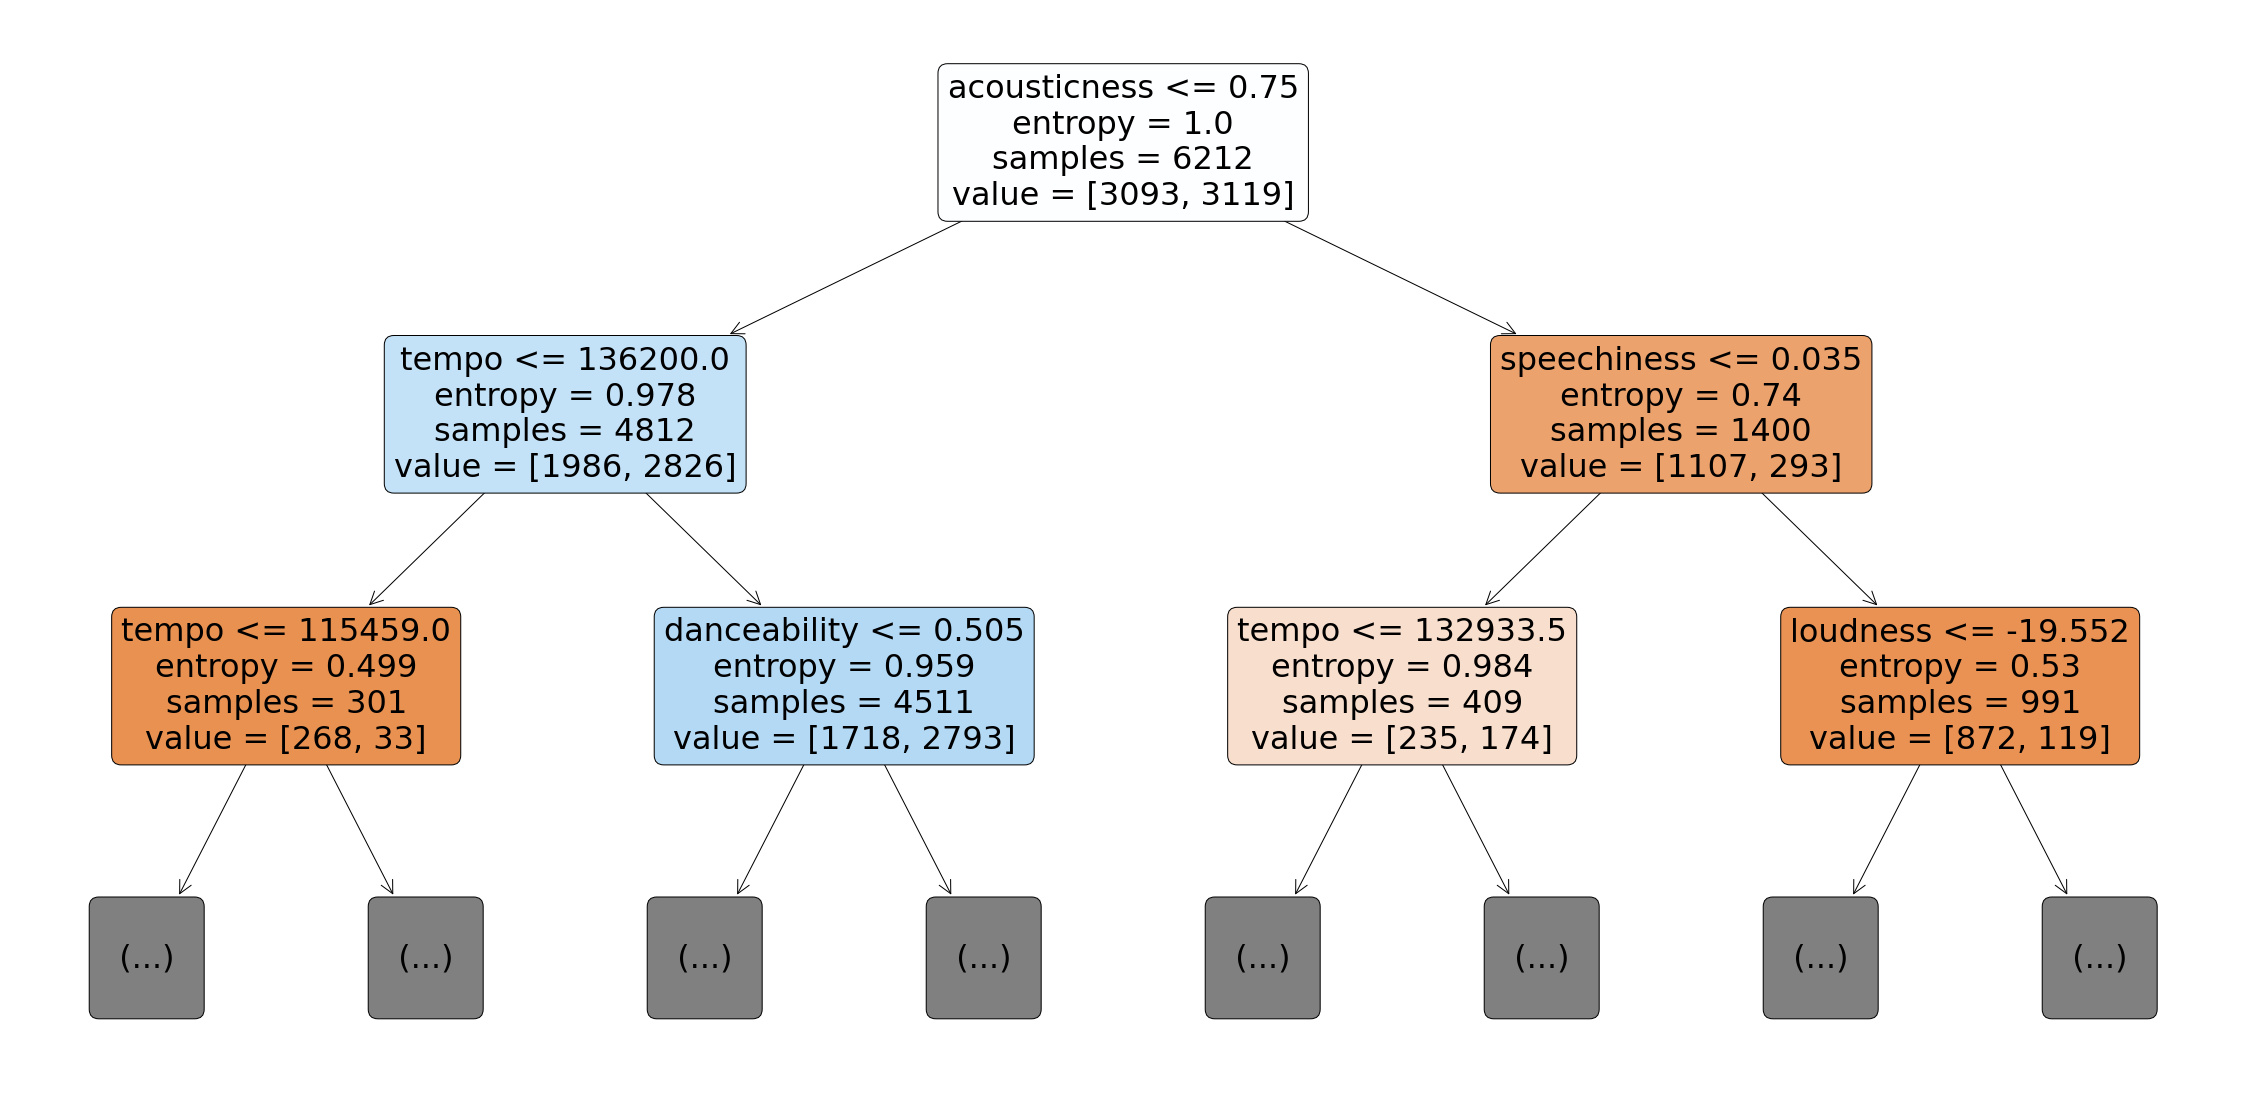

In [40]:
#Print decision tree to understand the data https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(dtClassifier70, feature_names = data.columns, 
             filled=True, fontsize=32, rounded = True, max_depth = 2)
plt.show()

In [41]:
#Decision Tree with entropy https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
#create classifier for decision tree
dtClassifier80 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
#train model on 80% split
dtClassifier80.fit(X_train8, y_train8)

#predict 20% based on model
y_pred8 = dtClassifier80.predict(X_test8)

print("DECISION TREE RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test8, y_pred8))
print(classification_report(y_test8, y_pred8))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(dtClassifier80, data8, label8, cv=10)
print(cvs)
cvsavgdt8 = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(dtClassifier80, data8, label8, cv=10, scoring="f1")
print(cvs)
cvsfdt8 = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgdt8))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfdt8))

DECISION TREE RESULTS: 

[[451 251]
 [134 546]]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       702
           1       0.69      0.80      0.74       680

    accuracy                           0.72      1382
   macro avg       0.73      0.72      0.72      1382
weighted avg       0.73      0.72      0.72      1382

10 fold cross validation reults, accuracy
[0.74819103 0.72503618 0.72069465 0.71490593 0.74963821 0.73371925
 0.7105644  0.73227207 0.72318841 0.72753623]


10 fold cross validation reults, f1
[0.75698324 0.71471471 0.73006993 0.71572872 0.77385621 0.749658
 0.7382199  0.76493011 0.74013605 0.7251462 ]


The sum of accuracies from the 10 fold validation is: 0.7285746345351203
The sum of f1 scores from the 10 fold validation is: 0.7409443075521589


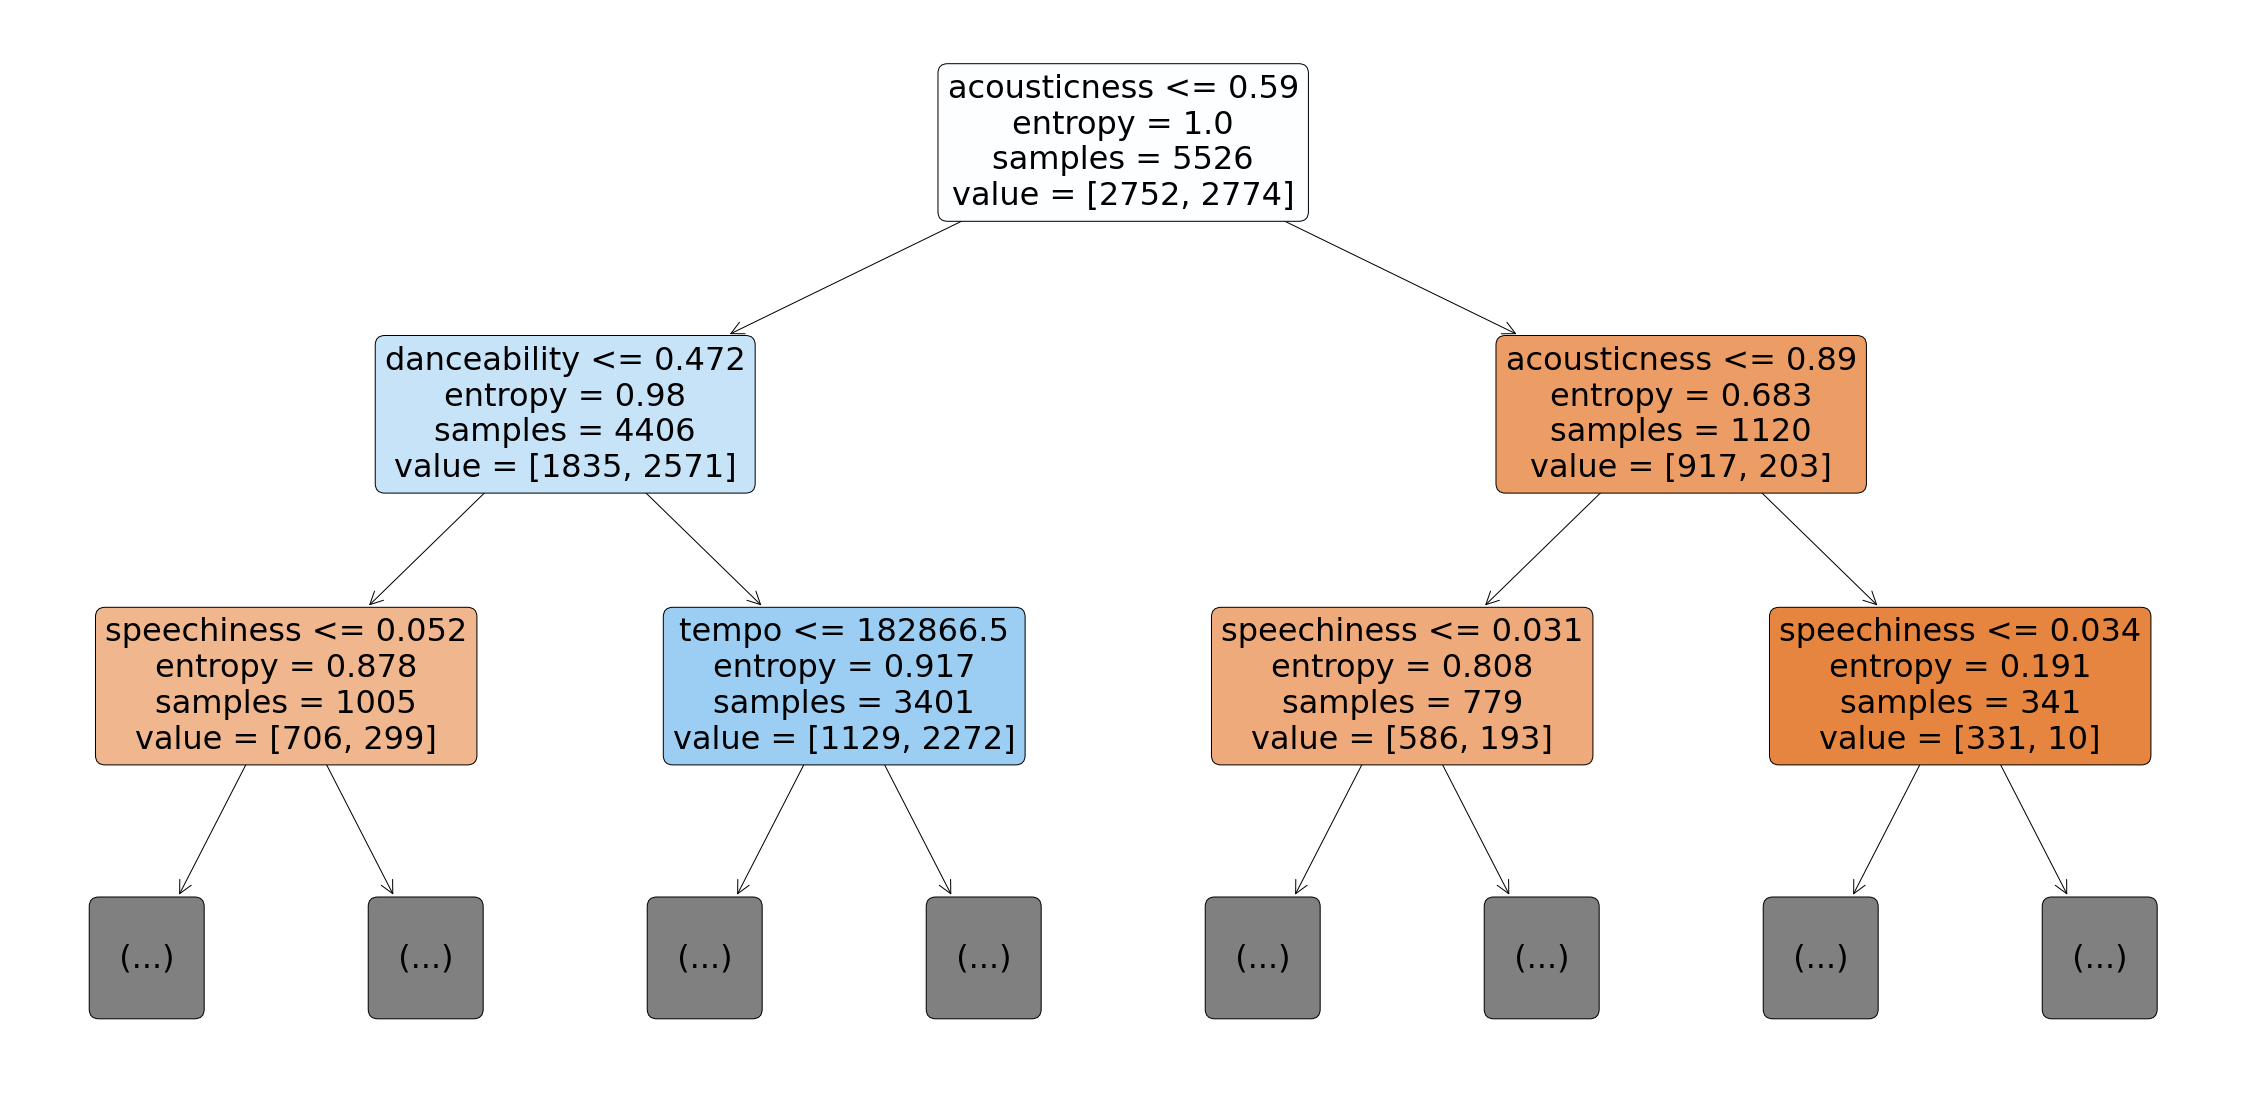

In [42]:
#Print decision tree to understand the data https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(dtClassifier80, feature_names = data.columns, 
             filled=True, fontsize=32, rounded = True, max_depth = 2)
plt.show()

In [43]:
#Decision Tree with entropy https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
#create classifier for decision tree
dtClassifier90 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
#train model on 80% split
dtClassifier90.fit(X_train9, y_train9)

#predict 20% based on model
y_pred9 = dtClassifier90.predict(X_test9)

print("DECISION TREE RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test9, y_pred9))
print(classification_report(y_test9, y_pred9))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(dtClassifier90, data9, label9, cv=10)
print(cvs)
cvsavgdt9 = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(dtClassifier90, data9, label9, cv=10, scoring="f1")
print(cvs)
cvsfdt9 = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgdt9))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfdt9))

DECISION TREE RESULTS: 

[[347 199]
 [ 52 506]]
              precision    recall  f1-score   support

           0       0.87      0.64      0.73       546
           1       0.72      0.91      0.80       558

    accuracy                           0.77      1104
   macro avg       0.79      0.77      0.77      1104
weighted avg       0.79      0.77      0.77      1104

10 fold cross validation reults, accuracy
[0.82065217 0.7826087  0.77173913 0.79347826 0.80072464 0.79710145
 0.7826087  0.80072464 0.77717391 0.76086957]


10 fold cross validation reults, f1
[0.82477876 0.78571429 0.78571429 0.8125     0.81469115 0.82165605
 0.79020979 0.81418919 0.80382775 0.76595745]


The sum of accuracies from the 10 fold validation is: 0.788768115942029
The sum of f1 scores from the 10 fold validation is: 0.8019238712769461


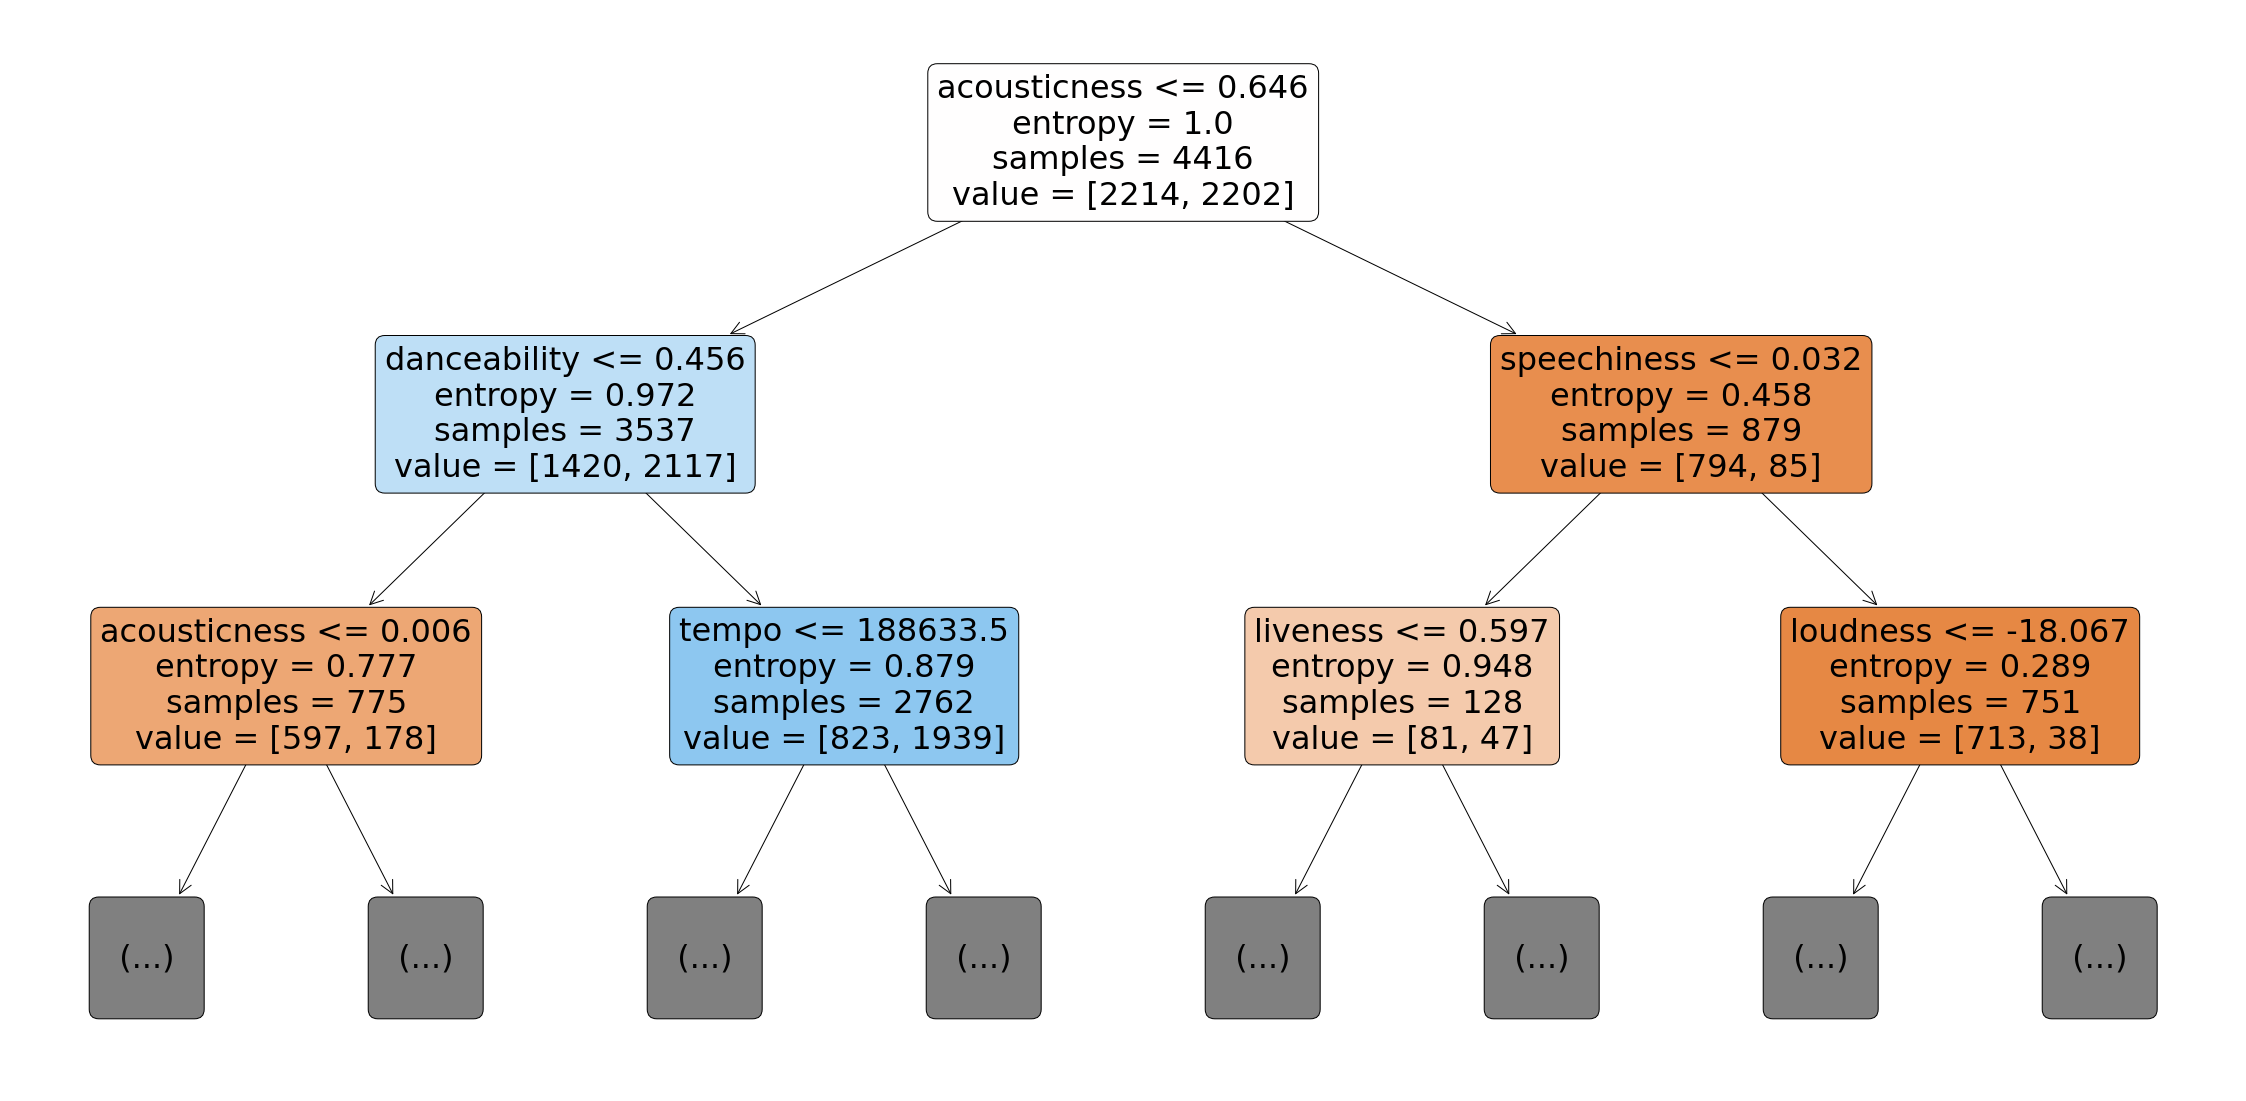

In [44]:
#Print decision tree to understand the data https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(dtClassifier90, feature_names = data.columns, 
             filled=True, fontsize=32, rounded = True, max_depth = 2)
plt.show()

In [45]:
#Decision Tree with entropy https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
#create classifier for decision tree
dtClassifier00 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
#train model on 80% split
dtClassifier00.fit(X_train0, y_train0)

#predict 20% based on model
y_pred0 = dtClassifier00.predict(X_test0)

print("DECISION TREE RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test0, y_pred0))
print(classification_report(y_test0, y_pred0))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(dtClassifier00, data0, label0, cv=10)
print(cvs)
cvsavgdt0 = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(dtClassifier00, data0, label0, cv=10, scoring="f1")
print(cvs)
cvsfdt0 = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgdt0))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfdt0))

DECISION TREE RESULTS: 

[[433 149]
 [100 493]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       582
           1       0.77      0.83      0.80       593

    accuracy                           0.79      1175
   macro avg       0.79      0.79      0.79      1175
weighted avg       0.79      0.79      0.79      1175

10 fold cross validation reults, accuracy
[0.77891156 0.79421769 0.78364566 0.79727428 0.78364566 0.78534923
 0.7802385  0.76660988 0.77512777 0.7955707 ]


10 fold cross validation reults, f1
[0.7826087  0.80131363 0.79809221 0.80837359 0.79349593 0.80851064
 0.7929374  0.77504105 0.77319588 0.80065898]


The sum of accuracies from the 10 fold validation is: 0.7840590921206644
The sum of f1 scores from the 10 fold validation is: 0.7934228004102383


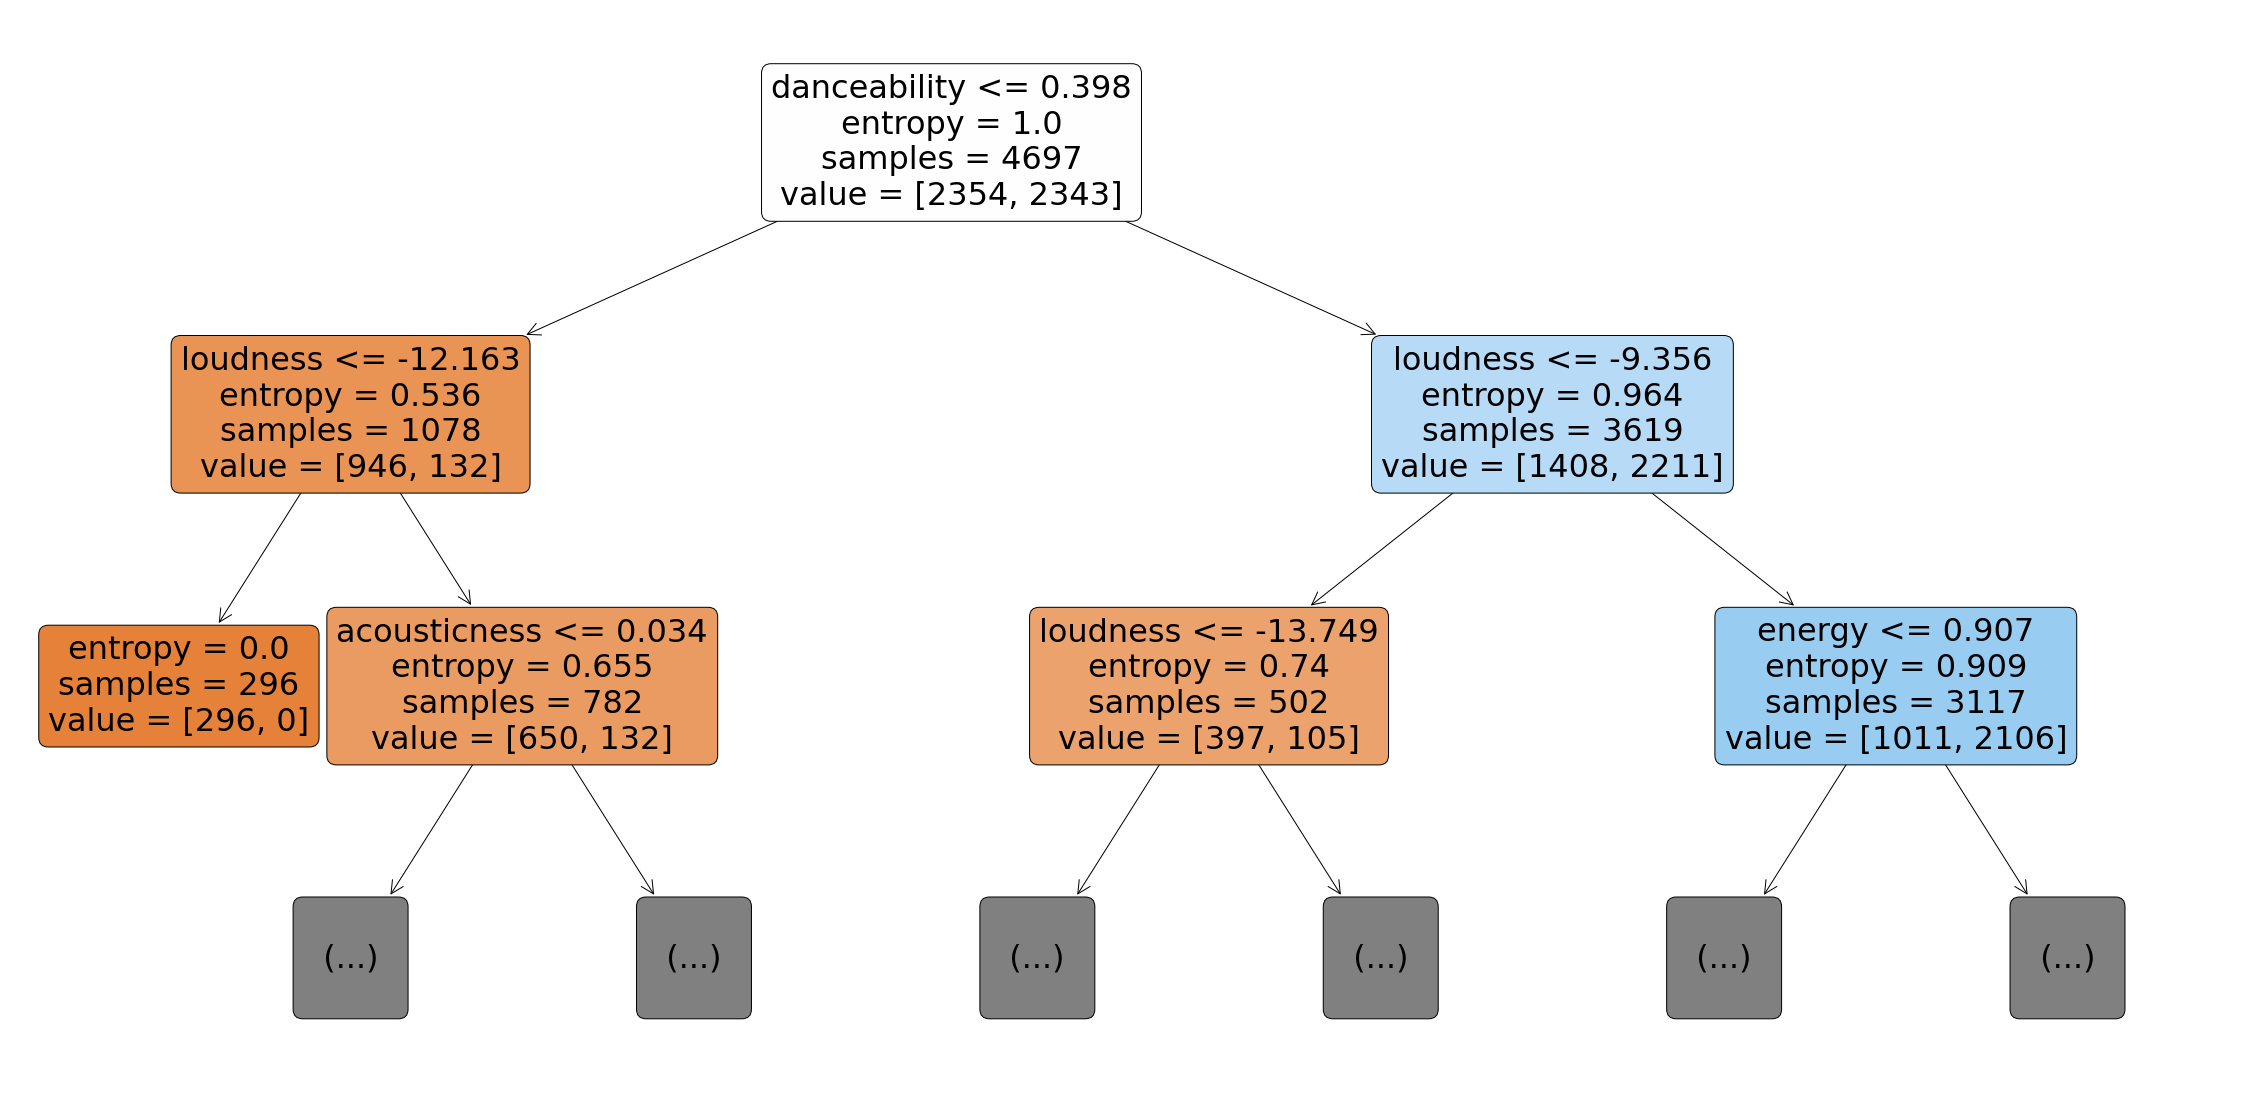

In [46]:
#Print decision tree to understand the data https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(dtClassifier00, feature_names = data.columns, 
             filled=True, fontsize=32, rounded = True, max_depth = 2)
plt.show()

In [47]:
#Decision Tree with entropy https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
#create classifier for decision tree
dtClassifier10 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
#train model on 80% split
dtClassifier10.fit(X_train1, y_train1)

#predict 20% based on model
y_pred1 = dtClassifier10.predict(X_test1)

print("DECISION TREE RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

#10 fold cross validation results
print("10 fold cross validation reults, accuracy")
cvs = cross_val_score(dtClassifier10, data1, label1, cv=10)
print(cvs)
cvsavgdt1 = sum(cvs) / len(cvs)
print("\n")

#10 fold cross validation results f1 score
print("10 fold cross validation reults, f1")
cvs = cross_val_score(dtClassifier10, data1, label1, cv=10, scoring="f1")
print(cvs)
cvsfdt1 = sum(cvs) / len(cvs)
print("\n")

print("The sum of accuracies from the 10 fold validation is: " + str(cvsavgdt1))
print("The sum of f1 scores from the 10 fold validation is: " + str(cvsfdt1))

DECISION TREE RESULTS: 

[[432 211]
 [ 81 556]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.75       643
           1       0.72      0.87      0.79       637

    accuracy                           0.77      1280
   macro avg       0.78      0.77      0.77      1280
weighted avg       0.78      0.77      0.77      1280

10 fold cross validation reults, accuracy
[0.775      0.759375   0.78125    0.7734375  0.7453125  0.7625
 0.7984375  0.76875    0.75117371 0.76212833]


10 fold cross validation reults, f1
[0.8021978  0.78729282 0.79472141 0.79833102 0.7620438  0.79569892
 0.8175389  0.8        0.77637131 0.78531073]


The sum of accuracies from the 10 fold validation is: 0.7677364534428796
The sum of f1 scores from the 10 fold validation is: 0.7919506702379613


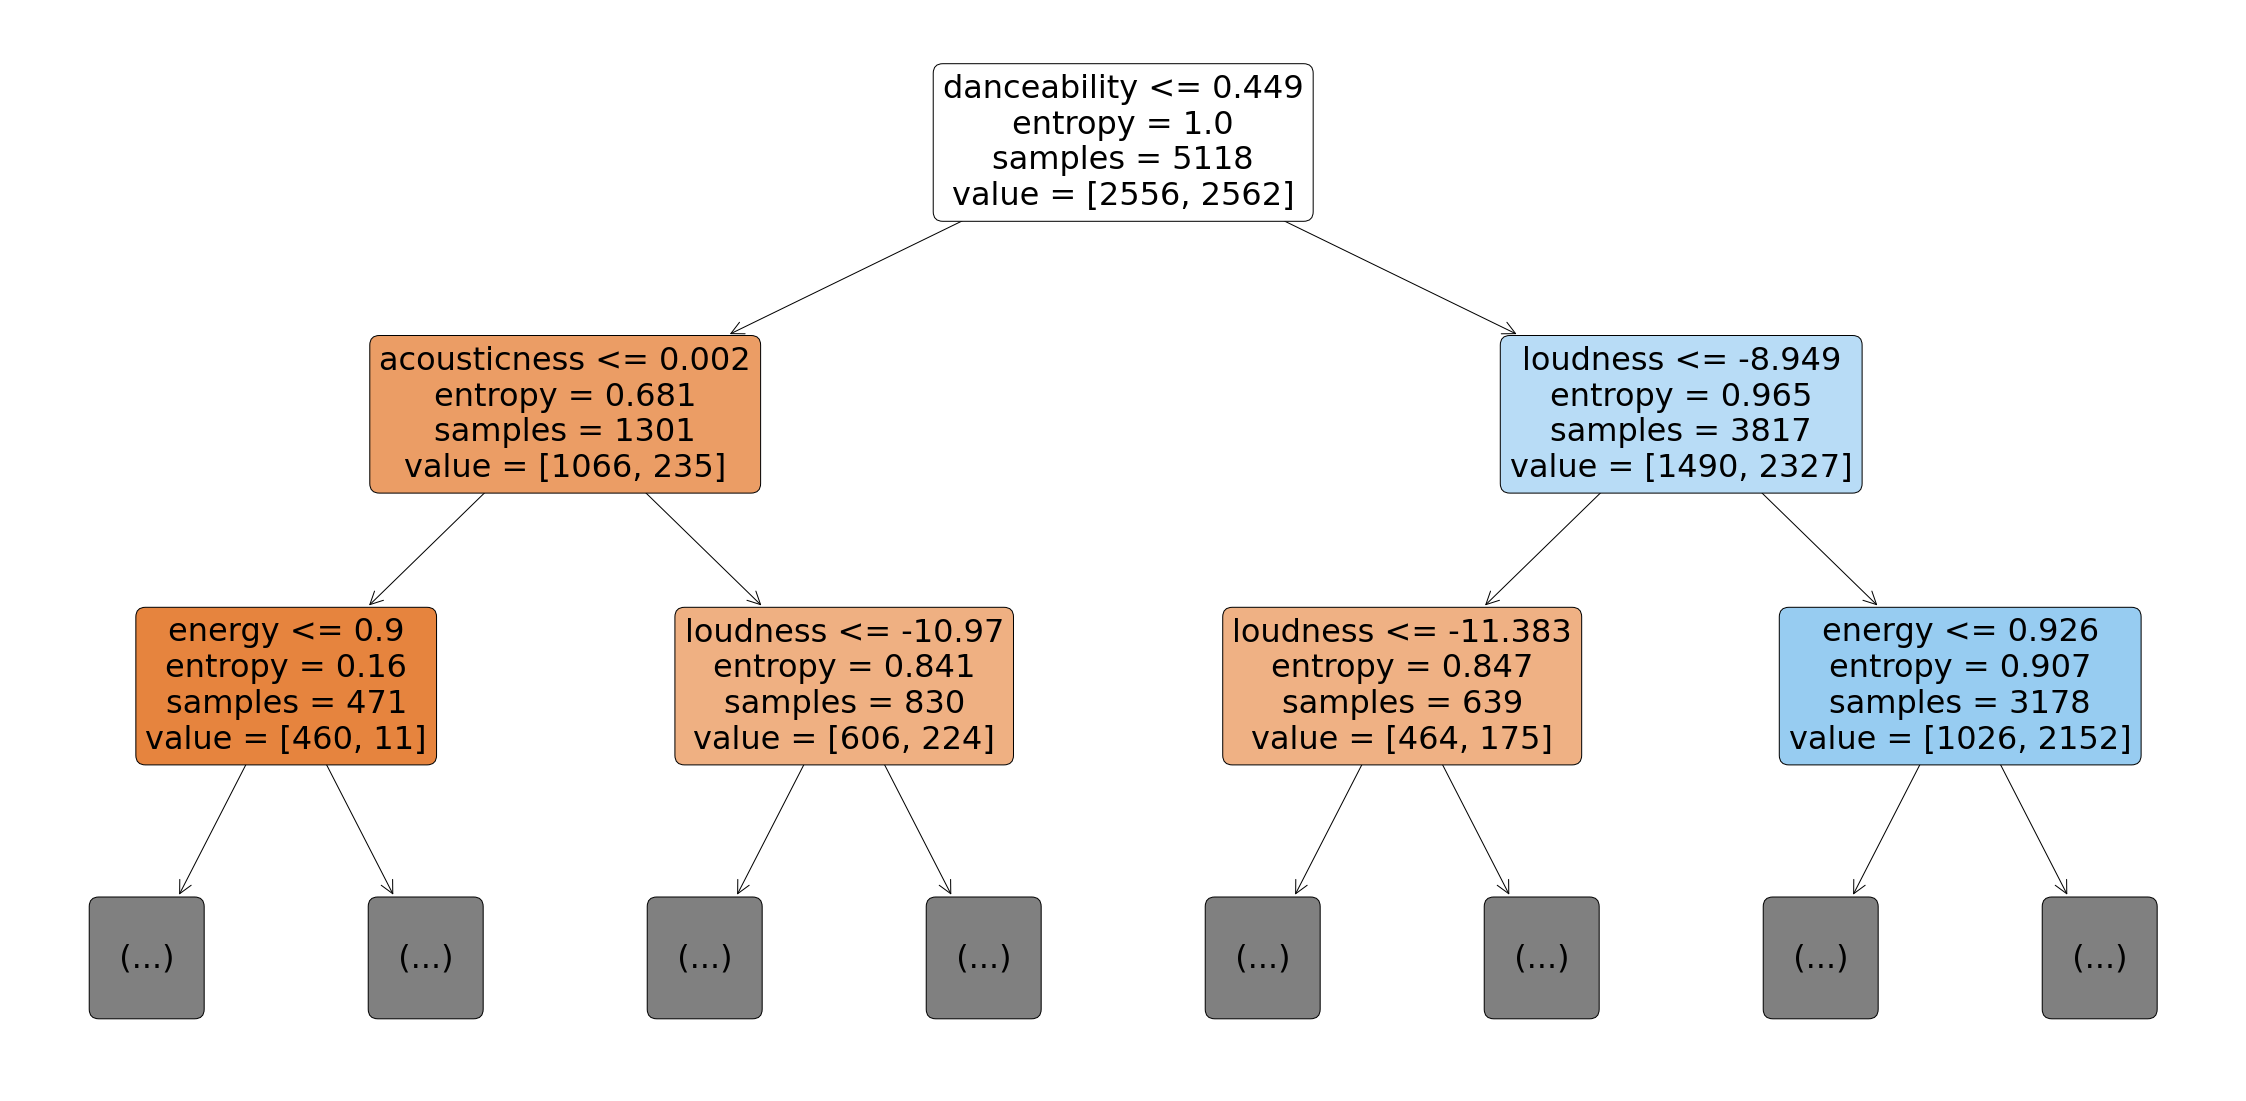

In [48]:
#Print decision tree to understand the data https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(dtClassifier10, feature_names = data.columns, 
             filled=True, fontsize=32, rounded = True, max_depth = 2)
plt.show()

Takeaways:

- Random Forest best classifier
- Instrumentalness was the best estimator, as expected
- By year, with instrumentalness taken away, the best estimator went in this order
    -60s: acousticness
    -70s: acousticness
    -80s: acousticness
    -90s: acousticness
    -00s: danceability
    -10s: danceability
    
- ENTROPY IS 1.0 FOR ALL FIRST NODES AND I HAVE NO REASON WHY, should be lower 